# Sklearn guide

Scikit-learn's clean and consistent API makes it popular for machine learning. It comes with toy data sets, a plethora of utilities for preprocessing, many different models, utilities to train models, define pipelines, test hyperparmeter sets, and evaluate model performance.

In [69]:
from sklearn import datasets
iris = datasets.load_iris() #for classification
digits = datasets.load_digits() #for classification
boston = datasets.load_boston() #for regression

In [2]:
print(iris.DESCR + '\n\n\n' + digits.DESCR + '\n\n\n' + boston.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
import matplotlib.pyplot as plt

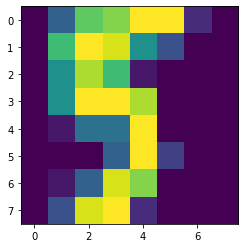

In [5]:
plt.imshow(digits.images[15])

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
len(iris.data)

150

As a first example in the sklearn API lets check out the iris dataset. In order to determine which model to use, we'll simply follow the flowchart given by sklearn:

<img src="sklearn-model-selection-flowchart.png">

Following the chart, we choose SVC first (linearSVC exactly), and then perhaps KNN and finally ensemble SVC.

Next we go to the [sklearn documentation page](https://scikit-learn.org/stable/modules/svm.html) for SVC. 

From a cursory reading we establish that the features should have mean 0 and variance 1. We then go to the [documentation for LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) and read about reasonable parameter choices, which we consider in our grid search.



In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [82]:
scalar = StandardScaler()
data = scalar.fit_transform(iris.data)
X_train, X_test, y_train, y_test = train_test_split(data, iris.target, random_state = 42)

param_grid = {'loss': ['hinge', 'squared-hinge'],
              'dual': [True, False],
              'tol': [1e-3, 1e-4, 1e-5],
              'C': [1, 2, 10]}

clf = GridSearchCV(LinearSVC(random_state = 0), 
                   param_grid = param_grid, 
                   scoring = 'accuracy', 
                   n_jobs = -1, 
                   cv = 5, 
                   verbose = True)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.7s finished
/home/jared/anaconda3/envs/ds/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=5, estimator=LinearSVC(random_state=0), n_jobs=-1,
             param_grid={'C': [1, 2, 10], 'dual': [True, False],
                         'loss': ['hinge', 'squared-hinge'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='accuracy', verbose=True)

In [83]:
clf.best_params_

{'C': 10, 'dual': True, 'loss': 'hinge', 'tol': 0.0001}

In [12]:
y_pred = clf.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



This was a very brief tour of a basic experiment workflow using sklearn. We use preprocessing functions and usually call `fit_transform()` to process the x_data (the fit implies that something is computed - in the case of StandardScalar the mean and variance of each column is computed, and the transform implies that we are performing the centering and scaling to the feature columns). We then use a function like `train_test_split()`, pick a parameter grid over which to search, and finally train the model using the model's `fit()` method and then `predict()` method for performance evaluation (in this case we gave GridSearchCV the model and, after it trains on the data, it can be used to make the predictions). Of course many steps were left out of this summary - we have to know which model type to choose, which hyperparameters make sense, which preprocessing steps are needed, which training method to use in terms of optimizer or penalty, and which metrics to use to evaluate model performance.

<hr>
Here I briefly review the preprocessing steps used in this experiment.

[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) is pretty straight forward - it normalizes the samples by setting the mean to 0 and variance to 1. One useful parameter to pass if the data were "large" would be `copy = False`, which normalizes the data in-place. 

[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) has parameters to control the test test (as a percentage or cardinality), whether or not to shuffle the dataset first, `random_state`, etc.

[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) itself has many parameters e.g. how to score the different models, how many cross-validation folds to use, how many cores to use, etc.









## Machine Learning Workflow Overview

Here are presented some examples using key methods to automate modeling. I'll use the boston data set and demonstrate a regression, as classification tasks are more involved.

### Learn about the data

In [20]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [73]:
import pandas as pd
attribs = list(boston['feature_names'])
df = pd.DataFrame(boston.data, columns=attribs)
df['MED_VALUE'] = boston.target

In [74]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MED_VALUE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    float64
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    float64
 9   TAX        506 non-null    float64
 10  PTRAT      506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MED_VALUE  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [37]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAT,B,LSTAT,MED_VALUE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [38]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [40]:
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAT,B,LSTAT,MED_VALUE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [41]:
corr['MED_VALUE']

CRIM        -0.388305
ZN           0.360445
INDUS       -0.483725
CHAS         0.175260
NOX         -0.427321
RM           0.695360
AGE         -0.376955
DIS          0.249929
RAD         -0.381626
TAX         -0.468536
PTRAT       -0.507787
B            0.333461
LSTAT       -0.737663
MED_VALUE    1.000000
Name: MED_VALUE, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95fe1fd9d0>,
      dtype=object)

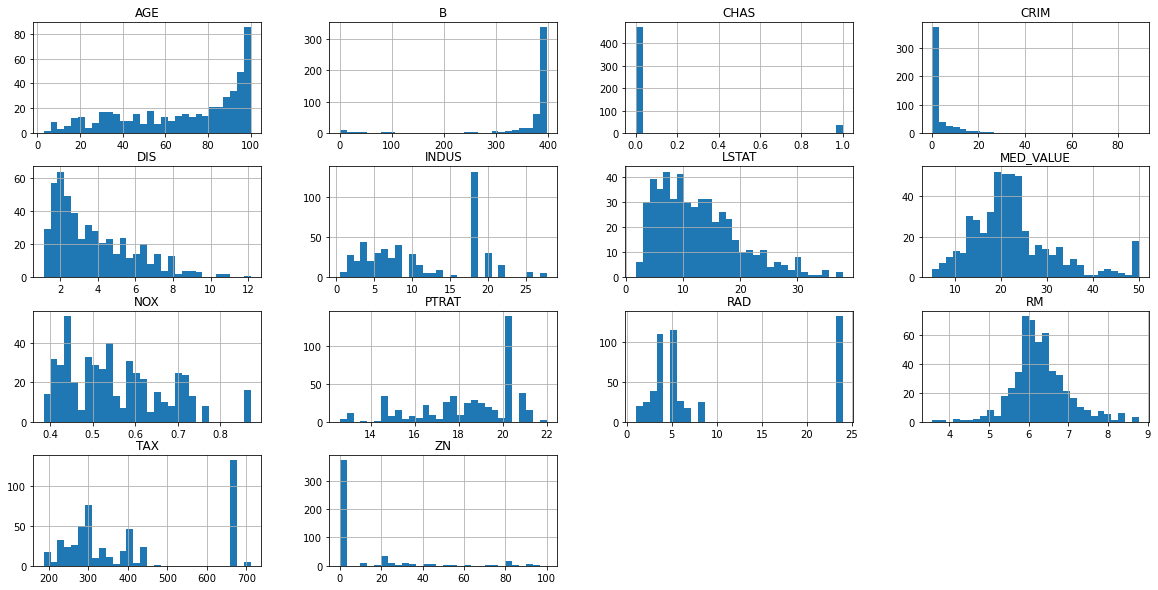

In [47]:
df.hist(bins=30, figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99f57c58b0>,
      dtype=object)

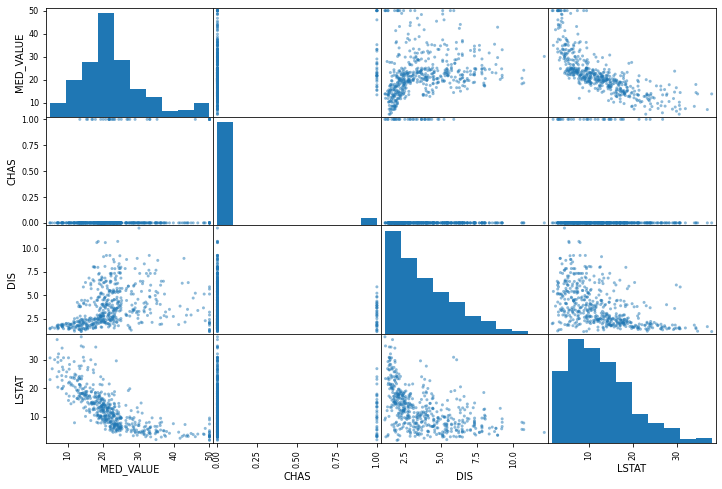

In [5]:
from pandas.plotting import scatter_matrix

#visualize the correlations for all or some of the attributes
attribs = ['MED_VALUE', 'CHAS', 'DIS', 'LSTAT']
scatter_matrix(df[attribs], figsize=(12,8))

#### Set aside a test set until the very end of model building process

In [84]:
from sklearn.model_selection import train_test_split

#it's best to stratify when classes are imbalanced. But numerical columns can be (and in this case are)
#imbalanced as well. In such cases, we can bin then using pd.cut() into categorical columns,
#startify them via their corresponding categorical columns, and then drop the categoprical columns
#(because they aren't part of the original dataset). I don't do that here for simnplicity.
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=42,
                                                    stratify=boston.data[:,3])

### Make pipelines for preprocessing and shortlist the best model from a bunch

In [85]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.utils.validation import check_X_y, check_array
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer

In [86]:
class NumericalFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, feature_degree=1, pca=0, scale=True):
        self.feature_degree = feature_degree
        self.pca = pca
        self.scale = scale
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.feature_degree > 1:
            poly = PolynomialFeatures(self.feature_degree, include_bias=False)
            X = poly.fit_transform(X)
                 
        if self.scale:
            scaler = StandardScaler()
            X = scaler.fit_transform(X)
        
        if self.pca > 0:
            pca = PCA(n_components=self.pca)
            X = pca.fit_transform(X)
            
        return X
    
    
    
class NaHandler(BaseEstimator, TransformerMixin):
    def __init__(self, impute=None):
        assert impute is None or impute in ['median', 'mean']
        self.impute = impute
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        # There are no NA values in this dataset, but
        # if there were then this transformer class would implement
        # ways to deal with them by dropping or imputing, which we could try out in
        # a pipeline
        
        return X
        
        
    
class ModelTryout(BaseEstimator, RegressorMixin):
    def __init__(self, model="linear"):
        self.model = model
        
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        
        self.estimator = None 
        
        if self.model == "linear":
            self.estimator = LinearRegression()
        elif self.model == "svr":
            self.estimator = SVR()
        elif self.model == "random_forest":
            self.estimator = RandomForestRegressor()
            
        self.estimator.fit(X, y)
        
        return self
    
    def predict(self, X):
        
        X = check_array(X)
        
        return self.estimator.predict(X)
        

In [137]:
num_attribs = list(range(13))
num_attribs.remove(3)


num_pipeline = Pipeline([
    ('na_handler', NaHandler()),
    ('transformations', NumericalFeatureTransformer())
])

col_transformer = ColumnTransformer(transformers=[("num", num_pipeline, num_attribs)], remainder='passthrough')


### This is what it would have looked like if we had wanted to transform categortical columns, say by
### one-hot encoding for instance.

#cat_attribs = [indices of categorical columns]
# cat_pipeline = Pipeline([
#     ("encode", OneHotEncoder())
# ])

# col_transformer = ColumnTransformer([
#     ("num", num_pipeline, num_attribs),
#     ("cat", cat_pipeline, cat_attribs)
# ])



full_pipeline = Pipeline([
    ("preprocessing", col_transformer),
    ("modeling", ModelTryout())
])

param_grid = {
    "preprocessing__num__transformations__feature_degree": [1, 2, 3],
    "preprocessing__num__transformations__scale": [True, False],
    "preprocessing__num__transformations__pca": [0, 1, 3, 5, 9],
    "modeling__model": ["linear", "svr", "random_forest"]
}

search = GridSearchCV(full_pipeline, param_grid, n_jobs=-1, verbose=1, scoring="neg_root_mean_squared_error")
search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 427 out of 450 | elapsed:   11.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   11.9s finished


GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('na_handler',
                                                                                          NaHandler()),
                                                                                         ('transformations',
                                                                                          NumericalFeatureTransformer())]),
                                                                         [0, 1,
                                                                          2, 4,
                                                                          5, 6,
                                                                          7, 8,
                   

In [138]:
print(search.best_score_)
print(search.best_params_)

-3.3011093895568075
{'modeling__model': 'random_forest', 'preprocessing__num__transformations__feature_degree': 3, 'preprocessing__num__transformations__pca': 0, 'preprocessing__num__transformations__scale': False}


In [136]:
print(-1 * search.best_score_ / np.mean(boston.target))

0.15011205120092647


#### It would seem that our best bet is a random forest without scaled features, with deg-3 feature interactions, and no pca.

### Fine tune the best model

In [144]:
from sklearn.model_selection import RandomizedSearchCV

num_attribs = list(range(13))
num_attribs.remove(3)


num_pipeline = Pipeline([
    ('na_handler', NaHandler()),
    ('transformations', NumericalFeatureTransformer())
])

col_transformer = ColumnTransformer(transformers=[("num", num_pipeline, num_attribs)], remainder='passthrough')

full_pipeline = Pipeline([
    ("preprocessing", col_transformer),
    ("model", RandomForestRegressor())
])

#we still want to try some of the preprocessing options. Since we had good results with the model's
#default parameters before, it's reasonable to leave them in here.
#We have 216000 fits to do here (43200 without 5-fold cv), so instead of searching the full
#grid, we'll do a random search, which trades off time for performance
param_grid = {
    "preprocessing__num__transformations__feature_degree": [1, 2, 3, 4],
    "preprocessing__num__transformations__scale": [True, False],
    "preprocessing__num__transformations__pca": [0, 1, 3, 5, 9],
    "model__n_estimators": [50, 100, 150, 200, 250, 500],
    "model__bootstrap": [True, False],
    "model__max_depth": [None, 5, 10, 25, 50],
    "model__max_features": ["auto", "sqrt"],
    "model__min_samples_leaf": [1, 2, 4],
    "model__min_samples_split": [2, 5, 10],
}

search = RandomizedSearchCV(full_pipeline, param_grid, n_jobs=-1, verbose=1,
                            n_iter = 2000,
                            scoring="neg_root_mean_squared_error")
search.fit(X_train, y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 8426 tasks      | elapsed: 26.8min
[Parallel(n_jobs=-1)]: Done 9776 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done 10000 out of 1000

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('na_handler',
                                                                                                NaHandler()),
                                                                                               ('transformations',
                                                                                                NumericalFeatureTransformer())]),
                                                                               [0,
                                                                                1,
                                                                                2,
                                                

In [145]:
print(search.best_score_)
print(search.best_params_)

-3.183710048591871
{'preprocessing__num__transformations__scale': False, 'preprocessing__num__transformations__pca': 0, 'preprocessing__num__transformations__feature_degree': 2, 'model__n_estimators': 250, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 25, 'model__bootstrap': False}


In [146]:
print(-1 * search.best_score_ / np.mean(boston.target))

0.14129221202177644


#### This was a pretty successful learning experiment. We decreased our best score using the fine tuning approach, and we may see, hopefully, that our predictions are off by only about 14%. 

Next we'll do cross validation to get a good sense if this performance  evaluation is accurate.

Finally we'll train the model one more time on the full training set, and evaluate its performance on the test set at last.

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

model_proposed = RandomForestRegressor(n_estimators=250,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       max_features="sqrt",
                                       max_depth=25,
                                       bootstrap=False)

num_pipeline = Pipeline([
    ('transformations', NumericalFeatureTransformer(scale=False,
                                                    pca=0,
                                                    feature_degree=2))
])

preprocessing_proposed = ColumnTransformer(transformers=[("num", num_pipeline, num_attribs)], 
                                           remainder='passthrough')

X_train_processed = preprocessing_proposed.fit_transform(X_train)

scores = cross_val_score(model_proposed, X_train_processed, y_train, cv=10, scoring="neg_root_mean_squared_error")

def display_scores(scores):
    print(f"Scores: {scores}")
    print(f"Avg score: {np.mean(scores)}")
    print(f"Std of scores: {np.std(scores)}")
    
display_scores(scores)

Scores: [-3.10491863 -2.8788457  -5.05484386 -3.2024997  -2.98780117 -2.44589918
 -3.9258367  -3.03529157 -2.39042449 -2.87715182]
Avg score: -3.1903512828140053
Std of scores: 0.7402032957414887


#### As we see, we have a decently accurate estimate of model performance

Now to evaluate the model on the test set.

In [90]:
model = RandomForestRegressor(n_estimators=250,
                              min_samples_split=2,
                              min_samples_leaf=1,
                              max_features="sqrt",
                              max_depth=25,
                              bootstrap=False)


model.fit(X_train_processed, y_train)

#do not refit this. Say we had used dimensionality reduction and found the best pca dimensions
#on our train data. We do not want to recompute this for the test data, we just want to
#project onto the dimensions we already learned
X_test_processed = preprocessing_proposed.transform(X_test)

y_pred = model.predict(X_test_processed)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)


2.970954848073483


In [92]:
# The last thing we may way to do is assess our confidence in this test rmse, the mean of the errors,
# and the average % deviance between target and prediction:

from scipy import stats

confidence = .95
errors = (y_pred - y_test)
squared_errors = errors ** 2
print(errors.mean())
print(np.mean(np.abs(errors / y_pred)))
print(np.sqrt(stats.t.interval(confidence,
                               len(squared_errors) -1,
                               loc=squared_errors.mean(),
                               scale=stats.sem(squared_errors))))

-0.2976881889763843
0.09504735592926442
[2.11223059 3.63202799]


## Classification Experiment Overview

Classification experiments are similar to regression experiments, but the performance evaluation is more involved than just checking the RMSE, a single number. 

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
mnist['target']

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
mnist['data']

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
mnist.data.shape

(70000, 784)

In [2]:
import numpy as np
X, y = mnist['data'], mnist['target'].astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

#### In the direction of training an assortment of models and shortlisting the best one(s), here are reviewed the ways in which we can assess the performance of a classification model. For simplicity we reduce the problem to binary classification. The extension to multiclass, multilabel, and multiclass-multilabel tasks is not difficult from this starting point.

In binary classification tasks it's usually the case that we have 1 minority class, called the "positive" class. When this is the case it's important to assess more than just accuracy. If the classes are (nearly) perfectly balanced, than accuracy will suffice however. 

#### We can use the following metrics to examine how well a model performs:

accuracy (% of the time the model is correct) = $\frac{TN + TP}{TN + TP + FN + FP}$ 

precision (% of correct positive predictions) = $\frac{TP}{TP + FP}$ 

recall (% of the time the model detects positive samples) = $\frac{TP}{TP + FN}$ 

Finally, a useful way to summarize precision and recall with one number:

f1 (a mean that gives more weight to smaller values) = harmonic_mean(precision, recall) 

In [13]:
y_train_5 = (y_train == 5)

sgd_clf_5 = SGDClassifier(random_state=42, n_jobs=-1)

#this function does a cross val train of the model, but instead of then evaluating the
#performance, it simply returns the predictions. That way, we get fresh predictions - 
#each prediction returned was made by a classifier that wasn't trained on that instance
y_train_5_pred = cross_val_predict(sgd_clf_5, X_train, y_train_5, cv=3)

accuracy = accuracy_score(y_train_5, y_train_5_pred)
recall = recall_score(y_train_5, y_train_5_pred)
precision = precision_score(y_train_5, y_train_5_pred)
f1 = f1_score(y_train_5, y_train_5_pred)

print(f"accuracy: {accuracy} \nprecision: {precision} \nrecall: {recall} \nf1: {f1}")

accuracy: 0.9570333333333333 
precision: 0.8370879772350012 
recall: 0.6511713705958311 
f1: 0.7325171197343846


#### Usually a point estimate of these numbers is not sufficient and we'll want to compute some statistics about them, but that's for later in the model building process

#### When any model is making class predictions, what happens under the hood is the model outputs a score for the input (or a probability, depending on the type of model), and then predicts the class of the input according as the score (or probability) is above or below a certain threshold. Sklearn doesn't let us choose the thresholds directly, but there is a workaround. Why would we want to choose a custom threshold? It depends whether precision or recall is more important for our application. A higher threshold would lead to greater precision and lower recall, while a lower threshold would lead to lower precision but greater recall. 

Below is a way to assess what threshold we need for our task, the precision-recall curve. Another plot is shown as
well, the ROC curve.

In [4]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

#we give this function the facility to evaluate and plot the performance of multiple models at one time
#Assumes: models is a list of tuples: ("modelname", unfitted_sklearn_model_object)
def plot_model_performance(models, X, y, prec_rec=True, roc=True):
    for model in models:
        try:
            y_scores = cross_val_predict(model[1], X, y, cv=3, method="decision_function")
        except:
            y_scores = cross_val_predict(model[1], X, y, cv=3, method="predict_proba")
            y_scores = y_scores[:,1]
            
        if prec_rec: 
            precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
            plt.figure(figsize=(20,10))
            plt.rc('font', **{'size' : 20})
            plt.plot(thresholds, precisions[:-1], label=f"{model[0]} Precision: TP/(TP + FP)")
            plt.plot(thresholds, recalls[:-1], label=f"{model[0]} Recall: TP/(TP + FN)")
            plt.xlabel("Threshold")
            plt.legend(loc="center left")
            plt.grid(True)
            plt.show()
            plt.clf()
            
        if roc:
            plt.figure(figsize=(20,10))
            plt.rc('font', **{'size' : 20})
            auc = roc_auc_score(y, y_scores)
            fpr, tpr, thresholds = roc_curve(y, y_scores)
            plt.plot(fpr, tpr, linewidth=2, label=f"{model[0]} ROC curve (AUC: {auc})")
            plt.xlabel("False Positive Rate : FP/(FP + TN)")
            plt.ylabel("True Positive Rate (Recall) : TP/(TP + FN)")
            plt.plot([0,1], [0,1], 'k--')
            plt.legend()
            plt.show()
            plt.clf()


In [5]:
from sklearn.ensemble import RandomForestClassifier

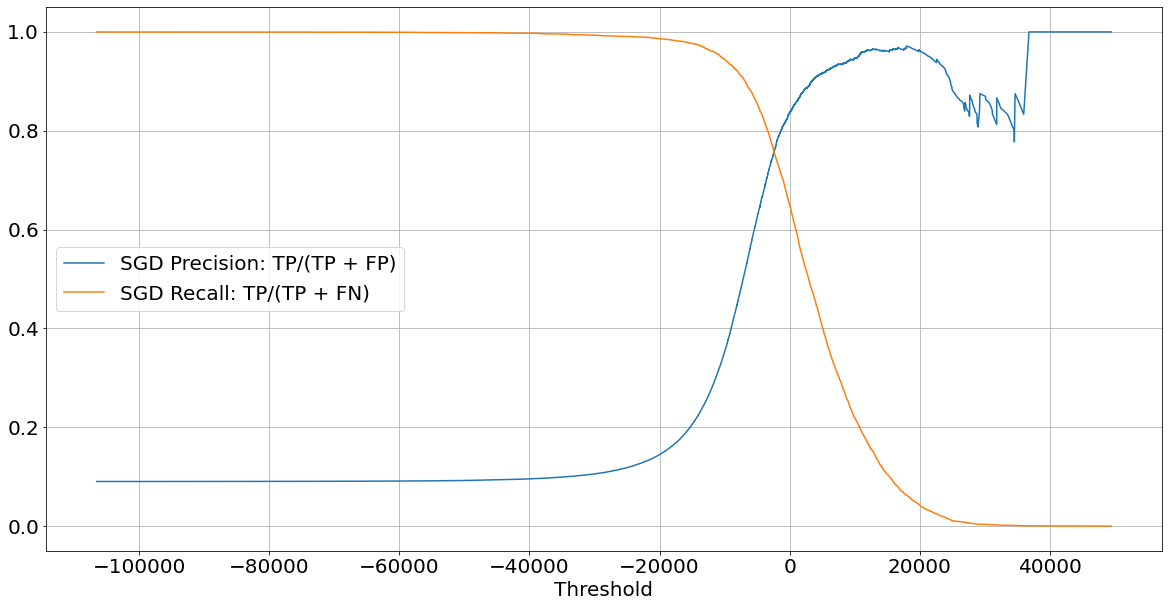

<Figure size 432x288 with 0 Axes>

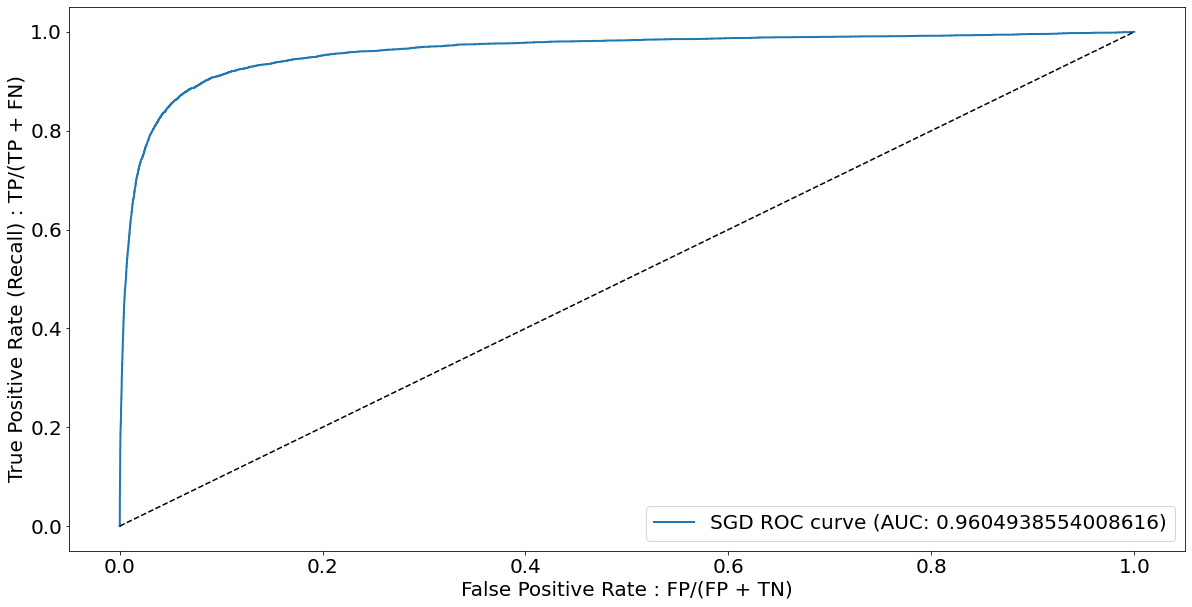

<Figure size 432x288 with 0 Axes>

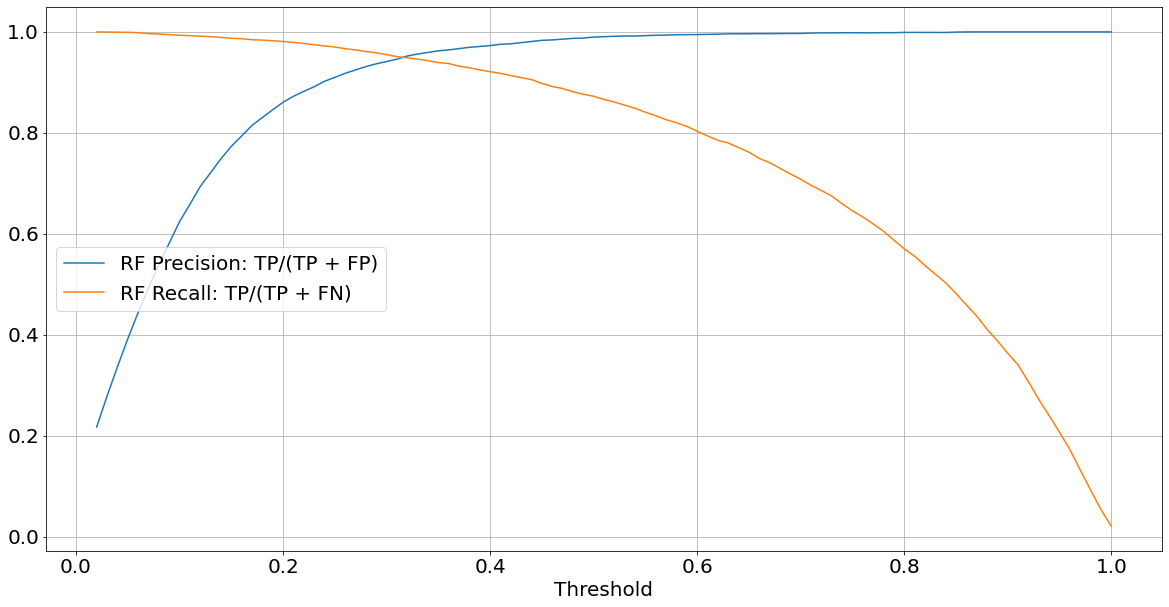

<Figure size 432x288 with 0 Axes>

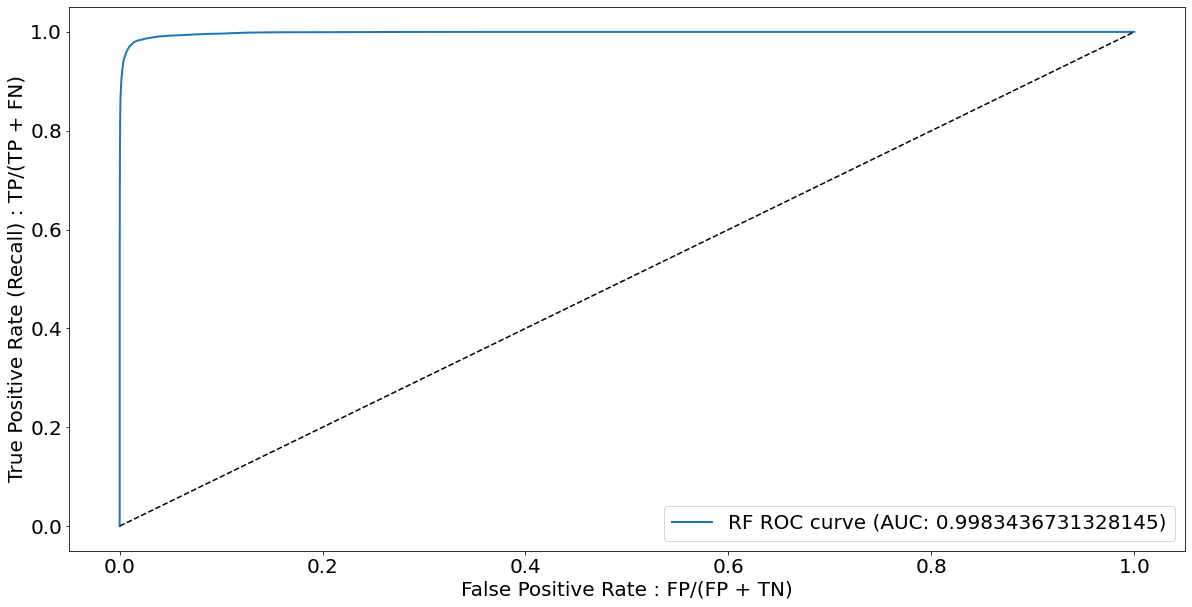

<Figure size 432x288 with 0 Axes>

In [44]:
rf_clf_5 = RandomForestClassifier(random_state=42, n_jobs=-1)
models = [("SGD", sgd_clf_5), ("RF", rf_clf_5)]
plot_model_performance(models, X_train, y_train_5)

In [45]:
#suppose now that we need  a recall of at least 90% for the application. We see our
#precision is then going to be around 50% if we choose SGD. Here's the workaround for making predictions with
#our desired threshold

#we use "decision_function" here because that's the member of SGDClassifier. Other models have a
#"predict_proba" method instead
y_train_5_scores = cross_val_predict(sgd_clf_5, X_train, y_train_5, method="decision_function", cv=3)

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_train_5_scores)

first_index_recall_less_than_90 = np.argmin(recalls >= 0.90)
threshold_90_recall = thresholds[first_index_recall_less_than_90]
y_train_5_pred_90_recall = (y_train_5_scores >= threshold_90_recall)

print(precision_score(y_train_5, y_train_5_pred_90_recall))
print(recall_score(y_train_5, y_train_5_pred_90_recall))
print(threshold_90_recall)

0.5160266582037448
0.8998339789706696
-6861.032537940256


#### So now we have seen ways to evaluate the performance of a classification model. According to the ML workflow what we now need is to try out many models and preprocessing combinations. The methodology here diverges a bit from that of a regression task. After this step, the process of  fine-tuning of the best model(s) from the previous stage, and assessing the performance of our final model, is virtually identical to that of a regression task. 

The methodology for trying out a bunch of different classification models is more complicated than that of regression models, for the following reason. In regression we are only trying to produce the best generalization error as measured by a single number, typically the RMSE. In classification on the other hand we are usually not just trying to optimize a single number, say generalization accuracy. But we are only not simply trying to singly optimize generalization recall or precision either. Instead what we are trying to do is find an acceptable tradeoff between recall and precision. Say we need a precision of 0.80; we can go about maximizing the recall for all such models with a precision above 0.80 and choose the best such model. But this is flawed - what if such a dumb algorithm winds up choosing a model with precision 0.80 and recall 0.60, while discounting a model with precision 0.75 and recall 0.70? This could be acceptable for our application and in fact be the best model in that sense. If we choose to singly maximize f1, we may never find a model with a score of 0.80. The best we may find is an f1 score of 0.71 arising from a model say with precision = 0.72 and recall = 0.70, and now the precision just plain isn't high enough for our application. 
What's more confounding, is that most realistic classification tasks will not be binary but multiclass. Here abounds the tradeoffs which we are trying to meet.

This is not to be discouraging about classification tasks. This is only to say that finding the best model from a large collection of which is not as easy as setting up a single GridSearchCV with a single Pipeline whose last entry is a single ModelTryout object. What we can do instead for binary classification is a bunch of GridSearchCVs with different preprocessing pipelines and models, and for each GridSearchCV do a plot_model_performance() for the best_estimator_. What we can do for multiclass classification, is the above except replace plot_model_performance() with the techniques from the below section.

### Multiclass Classificaition

When each data instance can belong to 1 of n > 2 classes (but not to more than 1 classes simultaneously), we have not 1 but n precisions and recalls to examine (one for each class). If we want to summarize these statistics we may look at the macro and weighted averages of the precisions and recalls. We would also be interested in the types of errors our model is making, i.e. are their biases in the errors, in other words when an instance of true class $i$ is wrongly classififed, is it more likely to be predicted as belonging to one class over another?

In [6]:
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.metrics import classification_report

def plot_error_matrix(conf_mx):
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    error_mx = conf_mx / row_sums
    np.fill_diagonal(error_mx, 0)
    
    plt.matshow(error_mx, cmap=plt.cm.gray)
    plt.colorbar()

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5923
           1       0.96      0.95      0.95      6742
           2       0.86      0.87      0.86      5958
           3       0.90      0.81      0.85      6131
           4       0.85      0.91      0.88      5842
           5       0.77      0.85      0.81      5421
           6       0.90      0.95      0.93      5918
           7       0.88      0.83      0.85      6265
           8       0.81      0.80      0.80      5851
           9       0.78      0.75      0.76      5949

    accuracy                           0.87     60000
   macro avg       0.87      0.87      0.87     60000
weighted avg       0.87      0.87      0.87     60000

[[5635    0   61   10   16   50   46    7   66   32]
 [   3 6393   95   21   16   47   15   27  109   16]
 [  72   56 5174   89   69   39  163   66  212   18]
 [  58   32  217 4941   23  441   32   56  216  115]
 [  11   26   46    6 5298   

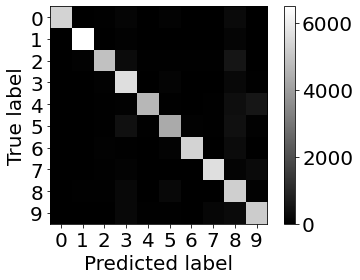

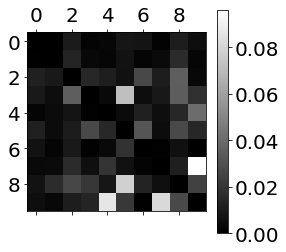

In [55]:
sgd_clf = SGDClassifier(random_state=42, n_jobs=-1)

#shows the precisions, recalls, f1s for each class, the averages of which, and the overall accuracy
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
print(classification_report(y_train, y_train_pred))

sgd_clf.fit(X_train, y_train)
#this function requires a fitted estimator
plot_confusion_matrix(sgd_clf, X_train, y_train, include_values=False, cmap="gray")

#this dataset is balanced so we needn't normalize the rows of the confusion matrix by diving the rows through
#by the number of instances in each class, but the below is how we would do as such
#plot_confusion_matrix(sgd_clf, X_train, y_train, include_values=False, cmap="gray", normalize="pred")



#We could example the confusion matrix directly in order to assess where the model is going wrong, but it
#helps to have a visual aid as well, so we know where to look
conf_mx = confusion_matrix(y_train, y_train_pred)
plot_error_matrix(conf_mx)
print(conf_mx)

From the above output we easily see that our model is good at classes 0, 1, and 6, while being relatively bad at classes 5, 8, and 9. The values of the confusion matrix tell us the amount of errors made, while the visualization of the confusion matrix tells us right away that the sheer amount of errors is much smaller than that of correct classifications. Further, the error matrix gives us the insight that 9's and 7's are often mistaken for each other, 3's are often mistaken as 5's, and that when the model thinks something is a 5, it's in reality quite often a 3 or an 8, and that when the model thinks something is a 4, it's quite often a 9. The precision of class 8 is on the low side, but we see from the error matrix that there's not a clear pattern of mistaking 8 for something else. 

Now, this is not the best model (a RandomForestClassifier happens to perform better), and the inputs haven't even been preprocessed, but let's suppose that this were the best model, fine-tuned, and that the above output were the true analysis of its errors. There are a couple of things we can do to improve performance. Firstly, suppose that for the sake of the application, it were essential that 5's had a recall of 0.95. We're going to make a composite model. The first will be a binary classifier for the class of 5, which has recall of 0.95. After running a data instance through that model, if the prediction isn't 5, we then run it through the above hypothetical best model, the general model. Hence, the overall model is guaranteed to have a recall of at least 0.95 for the class 5. Next, suppose we needed a precision of at least .95 for the case of class 8. We train another binary classifier to have this property. Any time our general model predicts an 8, we send it through the 8-detector. If the 8-detector (with 0.95 precision) thinks its an 8, then it passes, else the prediction goes to the class with the second highest decision_function or predict_proba score. Lastly, we can do something about the fact that 9's and 7's are confused for each other. We train a binary model to recognize only 9's and 7's. After running a data instance through the first models, if the prediction is either 9 or 7, we run the instance through our 9-7 discriminator. We thus end up finally with a frankenstein of 4 models.

Notice we would not be able to increase the *recall* of two of the classes. Once we set the recall of 5 to 0.95 in this fashion, we can not then hope to achieve 0.95 recall for class 8 - many of the 8 instances (and instances of other classes for that matter) are going to be wrongly classified as 5. Indeed, the recalls of many/all other classes are going to take a hit. Similarly, we can not hope to reliably increase the precision of more than one class. Raising the precision of class 8 will lead to the precisions of many/all other classes taking a hit.

In [7]:
from sklearn.base import BaseEstimator, ClassifierMixin

In [32]:
def second_largest_index(container):
    largest_index = 0
    second_largest_index = 0
    largest = container[0]
    for i in range(1, len(container)):
        if container[i] > largest:
            second_largest_index = largest_index
            highest = container[i]
            largest_index = i
            
    return second_largest_index


#Takes fitted estimators and predicts instance labels via the algorithm above
class FrankenStein(BaseEstimator, ClassifierMixin):
    def __init__(self, five_detector, general_model, eight_confirmer, seven_nine_discriminator):
        self.five_detector = five_detector
        self.general_model = general_model
        self.eight_confirmer = eight_confirmer
        self.seven_nine_discriminator  = seven_nine_discriminator
        
    def fit(self, X, y=None):
        return self
    
    def predict(self, X):
        y_pred = self.five_detector.predict(X)
        
        for i in range(y_pred.shape[0]):
            if y_pred[i] != 5:
                y_pred[i] = self.general_model.predict(X[i])
                
            if y_pred[i] == 8:
                if self.eight_confirmer.predict(X[i]) != 8:
                    y_pred[i] = second_largest_index(self.general_model.decision_function(X[i]))
                    
            if y_pred[i] == 7 or y_pred[i] == 9:
                y_pred[i] = self.seven_nine_discriminator.predict(X[i])
                
        return y_pred
                    
                    


### Multilabel and multiclass-multilabel tasks


#### Multilabel:
When instances can be associated with n > 1 binary labels, e.g. $((23.,4.5,-0.1,5.31), (1,0,1))$

#### Multiclass-multilabel
When instances can be associated with n > 1 multiclass labels e.g. $((23.,4.5,-0.1,5.31), (1,0,2))$

*From now on both modes will be referred to as just "multilabel".*

Note not all models natively support these prediction modes (and for that matter not all models natively support multiclass mode), but in many cases these modes can be implemented using techniques like OvR, OvO, etc.

<img src="sklearn-classification-support.png">



A simple way to evaluate multilabel experiments is to treat them as iterated single-label experiments (in the evaluation phase, not in the training phase), and evaluate via the above methods each label column separately. But through this technique alone, though, one may miss interesting patterns in the errors. For instance, perhaps label_2 is more likely to be misclassified accross all classes when label_1 is misclassified, or clasified correctly, or belongs to class $k$ regardless of how it gets classified. Or perhaps, for a more specific scenario, label_2 is more likely to be misclassified as belonging to class $i$ (as opposed to class $j \neq i$) strictly when label_1 belongs to class $k$ but gets predicted as class $p$.

One could go about looking for these scenarios by computing "conditional metrics" i.e. the classification report of label_i, given that label_j is predicted as $k(j)$ and belongs to $p(j)$, for all $j \neq i$. But these may be prohibitively numerous for a human to examine all of them:

If there are $m$ labels and label $m$ has $c(m)$ classes, then there will be $\sum_{i = 1}^{m} \prod_{n \neq m} c(n)^2$ conditional metrics.




In [17]:
y_even = (y_train % 2)
y_small = (y_train < 5)
y_multilabel = np.c_[y_even, y_small].astype('float32')

y_3 = (y_train % 3)
y_multilabel_multiclass = np.c_[y_even, y_3].astype('float32')

In [26]:
y_multilabel_multiclass

array([[1., 2.],
       [0., 0.],
       [0., 1.],
       ...,
       [1., 2.],
       [0., 0.],
       [0., 2.]], dtype=float32)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
kn_clf = KNeighborsClassifier(n_jobs=-1)
y_pred = cross_val_predict(kn_clf, X_train, y_multilabel_multiclass)
print(classification_report(y_multilabel_multiclass[:,0], y_pred[:,0]))
print(classification_report(y_multilabel_multiclass[:,1], y_pred[:,1]))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     29492
         1.0       0.98      0.99      0.98     30508

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98     23921
         1.0       0.97      0.99      0.98     18849
         2.0       0.99      0.96      0.97     17230

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000



              precision    recall  f1-score   support

         0.0       0.03      0.19      0.05        48
         1.0       0.26      0.43      0.33       206
         2.0       0.82      0.22      0.35       498

    accuracy                           0.28       752
   macro avg       0.37      0.28      0.24       752
weighted avg       0.62      0.28      0.32       752



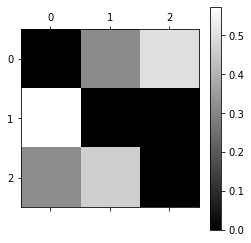

In [65]:
# Here's a way to implement the conditional metrics described above.
# Let's look at the metrics for the second label, given some conditions for the first label

first_label_is_0 = y_multilabel_multiclass[:,0] == 0
first_label_pred_1 = y_pred[:,0] == 1

bool_array = np.all([first_label_is_0, first_label_pred_1], axis=0)
y_mm_conditional = y_multilabel_multiclass[:,1][bool_array]
y_pred_conditional = y_pred[:,1][bool_array]
conf_mx = confusion_matrix(y_mm_conditional, y_pred_conditional)
print(classification_report(y_mm_conditional, y_pred_conditional))
plot_error_matrix(conf_mx)

We see from the above reports for instance that, given the number is even but the model predicts odd, the model is then also terrible at predicting its value modulo 3 when the number is 0 or 6 (target is 0 mod 3), but fairly precise when the number is 2 or 8 (target is 2 mod 3).

Now let's look at the conditional metrics for the second label, given that the first label was classified correctly.

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     11793
         1.0       0.99      1.00      0.99      5636
         2.0       1.00      0.99      0.99     11311

    accuracy                           0.99     28740
   macro avg       0.99      0.99      0.99     28740
weighted avg       0.99      0.99      0.99     28740



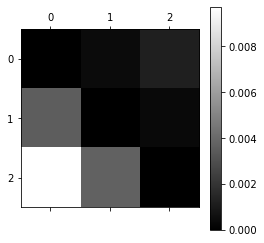

In [66]:
first_label_pred_0 = y_pred[:,0] == 0

bool_array = np.all([first_label_is_0, first_label_pred_0], axis=0)
y_mm_conditional = y_multilabel_multiclass[:,1][bool_array]
y_pred_conditional = y_pred[:,1][bool_array]
conf_mx = confusion_matrix(y_mm_conditional, y_pred_conditional)
print(classification_report(y_mm_conditional, y_pred_conditional))
plot_error_matrix(conf_mx)

In this case the model performs quite well. Let's examine the conditional metrics one more time, this time
when the first label is incorrectly classified, but in the opposite way as in the first example

              precision    recall  f1-score   support

         0.0       0.28      0.20      0.23       168
         1.0       0.21      0.33      0.26        45
         2.0       0.14      0.17      0.15       102

    accuracy                           0.21       315
   macro avg       0.21      0.23      0.21       315
weighted avg       0.22      0.21      0.21       315



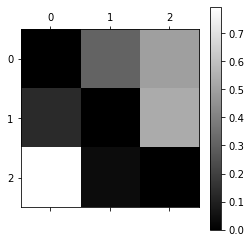

In [67]:
first_label_is_1 = y_multilabel_multiclass[:,0] == 1
first_label_pred_0 = y_pred[:,0] == 0

bool_array = np.all([first_label_is_1, first_label_pred_0], axis=0)
y_mm_conditional = y_multilabel_multiclass[:,1][bool_array]
y_pred_conditional = y_pred[:,1][bool_array]
conf_mx = confusion_matrix(y_mm_conditional, y_pred_conditional)
print(classification_report(y_mm_conditional, y_pred_conditional))
plot_error_matrix(conf_mx)

The patterns in the errors are completely different than in the earlier scenario.

Finally, supposing we have our final model in hand, here is what we can do to get a true sense of its performance.

In [93]:
from sklearn.model_selection import cross_val_score

In [16]:
accs = cross_val_score(sgd_clf_5, X_train, y_train_5, scoring="accuracy", cv=10)
f1s = cross_val_score(sgd_clf_5, X_train, y_train_5, scoring="f1", cv=10)
print(f"mean accuracy: {np.mean(accs)} \nstd accuracy: {np.std(accs)} \nmean f1: {np.mean(f1s)} \nstd f1: {np.std(f1s)}")


mean accuracy: 0.9635333333333334 
std accuracy: 0.0038273866918419556 
mean f1: 0.7844754961558148 
std f1: 0.03721329682010556


<hr>

# SVM Overview

SVM attempts to find a function $f$  mapping instances $x$ to one of two classes according as $f(x) \geq 0$ or not. The function takes the form $f(x) = w^Tx+b$, where $w$ is the weight vector and $b \in R$ is a bias term. These are the parameters to be learned. Hence, the function is a hyperplane - a plane in space 1 dimension higher than the feature space. 

Not only does the function seek to separate points in this way, but it seeks separate them "well", in the following sense. If the labels $y_i$ are considered to be in $\{1, -1\}$, then we seek $f$ such that $y_i(w^Tx_i + b) \geq 1,  \forall i$. This ensures that not only are the instances correctly classified, but also that they're not close to the boundary - the (affine) set of $x \in R^{\textrm{#features}}$ such that $f(x) = 0$. The qualtity 1 is chosen arbitrarily but 1 is convenient value. But not *only* do we want the instances far from the margin: we also want the margin to be as wide as possible. The wideness of the margin is controlled by the slope of the hyperplane, which is in turn controlled by the magnitude $||w||$ of $w$. Hence, in the hard-margin formulation (no instances allowed in the margin), we have the following optimization problem:

minimize $\frac{1}{2}w^tw$

subject to $y_i(w^Tx_i + b) \geq 1, \forall i$

while in the soft-margin (some instances allowed in the margin) formulation, we have the following optimization problem:

minimize $\frac{1}{2}w^tw + C\sum_i \eta_i$

subject to $y_i(w^Tx_i + b) \geq 1 - \eta_i, \eta_i \geq 0, \forall i$

where here the $C$ is a hyperparameter adjusting the penalty of margin violations. Higher $C$ results in more penalty, hence fewer (and smaller) margin violations, by virtue of finding a smaller margin (steeper hyperplane), and we are searching for optimal $\eta's$ as well (they are parameters not hyperparameters). In practice we can set the summation to other loss functions, e.g. `'hinge'`.

<img src="svm-hyperplane.png">

Note that the soft-margin formulation is always feasible, because if data isn't linearly separable, then what happens is those problem instances wind up with large $\eta's$.

This is a quadratic programming problem with a convex objective function and guaranteed feasible solutions. There exist optimized libraries and interfaces to solve such problems. Sklearn uses the libsvm library. 

The above is the *primal* formulation. We can also derive a *dual* formulation from the primal. These are concepts from optimization which are out of scope here. But here are the crucial considerations of the dual problem.

**The dual formulation will be faster than the primal when the number of instances is less than the number of features. All we have to do is set the `dual` hyperparameter to `True`.**

**The dual formulation allows us to make use of the *kernel trick* - using a function to implicitly map the instances to a higher dimensional feature space, where they may be linear separable even if they aren't so in the original feature space.**

Note that use the dual formulation and kernel trick is different than useing sklearn's `PolynomialFeatures` for several reasons. One, the kernel trick doesn't actually produce more features, so there's no necessary curse-of-dimensionality/overfitting problem as there would be by truely transforming the instances to have more features (overfitting is a problem however depending on how the hyperparameters concerning the choice of kernel function are set. If we use a polynomial kernel with high degree for instance, we may still overfit). Secondly, there are kernels other than polynomial kernels. The kernel trick relies on the fact that in the dual formulation, we only need the inner product of the instances, not the instances nor their features themselves.

Practically speaking, if we use one of sklearn's svm classes other than LinearSVC, the formulation will be the dual with a nonlinear kernel automatically. Also, in practice we never use hard-margin formulation because it's sensitive to outliers and may not always have a feasible solution.

In the model exploration phase, what we want to do is try out different kernels (including linear i.e. dual formulation with a linear mapping that doesn't send the instances to a higher dimensional space) with different sets of their own hyperparameters, with different $C$ values and different loss functions. 

Note lastly that online SVM is possible, for instance using the `SGDClassifier` class in online mode, which solves
the optimization problem iteratively in mini batches used gradient descent. This is much slower than using exact QP methods, but of course this can only be used when the data fits in memory.

<img src="svm-pros-cons.png">


Here is the use case for SVMs. Suppose that we have 2-class categorical data $\{ (x_1, y_i) | y_i \in \{ -1,1 \} \}$ which is linearly separable through a hyperplane in the feature space (there's a functional $l$ on the feature space for which $l(x_i)$ > 0 iff $y_i = 1$). The decision boundary is the set of vectors such that $l(x) = 0$. Clearly there are infinite solutions. SVMs find the solution which maximizes the minimum distance between the decision boundary and the closest point to which. There are legitimate probabilistic arguments demonstrating such a technique provides for a low generalization error. The mathematical development of the problem and its solution is quite complicated. 

Then, to extend to multi-class problems, the OvR or OvO approaches are taken.

Another common use of SVMs is for anomaly detection.

Keep in mind that SVMs are not designed to give probabilities of a sample belonging to a class (they can be through of as purely decision engines), but there are some [workarounds](https://scikit-learn.org/stable/modules/svm.html#scores-and-probabilities) that sklearn suggests, but they're expensive.

sklearn provides 3 SVM implementations: [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), and [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC).

In terms of complexity, with number of samples $n$ and features $m$, the first is $O(mn)$ (but doesn't support nonlinear kernels), while the later two are between $O(mn^2)$ and $O(mn^3)$ depending on qualities of the data. Therefore, LinearSVC is preferred when linear kernel gives similar model generalization performance as nonlinear kernel. If you want to use a certain kernel, pass the argument `kernel='kernelname'` to the classifer (customer kernels are a possbility as well but I don't get into detail.) `LinearSVC` uses OvR by default while the other two use OvO by default (but this can be changed by passing a parameter.

### Practical considerations:

1. For SVC and NuSVC, the data must be C-contiguous and float, else it will be copied as such, which is expensive. Check this with numpy `.flags` member. 
For LinearSVC, data is necessarily copied to the implementation's (liblinear) data representation, which is expensive. If the data is large, consider use sklearn's `SGDClassifer` instead.

2. For SVC and NuSVC, set the parameter `cache_size` as large as possible for the memory of the machine, if the data is large.

3. The `C` parameter controls regularization. Set it small to increase regularization i.e. if the data is noisy. For LinearSVC, large values of `C` can greatly increase training time. 

4. Normalize the data first as SVMs are not scale invariant

5. Increasing C leads to a more complex model, and with LinearSVC, L1 penalty will make a sparse model.

6. The training algorithms involve random steps, thus the learned parameters are not deterministic. This can be turned off if needed however with the classifier's hyperparameters.

7. When classes in the training data are unbalanced, use the classifier's hyperparameters to [adjust for this](https://scikit-learn.org/stable/modules/svm.html#unbalanced-problems) (setting `class_weight='balanced'` is one way to deal with this)


### Ways to regularize:

Hyperparameters:

`C`  - decrease to reduce overfitting

`degree` (only when using `kernel='poly'`) - decrease to reduce overfitting

`gamma` (only when using `kernel='rbf'`) - decrease to reduce overfitting


#### SVM Regression

Regression is also possible with SVM. The formulation is basically the reverse of that for classification: find a linear boundary and a (narrowest possible) margin about which, while maximizing the number of instances falling *within* the margin. Then, the linear boundary is taken as the regression mean. Here, the margin boundary is controlled by a hyperparameter `epsilon`


# Decision Tree Overview
<a id='decision'></a>

Decision trees can make reliable predictions (in classification and regression) and are highly interpretable (the learned decision boundary can be visualized with a binary tree using the `sklearn.tree.plot_tree()` function, and further this visual can be exported and converted to .png format with help of the 'graphviz' package), and they do not require feature normalization or encoding. But they are extremely sensitive to perturbations of the dataset, rotations of the dataset, and outliers. In other words they have very high variance. Recall this means that slightly different training sets will result in wildly different learned functions. For this reason, they are best deployed in ensemble algorithms (to be discussed shortly). 

The sklearn implementation uses the CART algorithm: constructed is a binary tree whose leafs are the predictions. To make a prediction, the algorithm traverses the tree, going left or right according by the values of the instance's features, until a leaf node is encountered. 

The training algorithm is initialized as the head node of the tree. At each step, sought after is the feature, and value for which, which can be used to split the remaining subset of the dataset (not necessarily evenly) into more "pure" subsets. The purity is measured by gini impurity (or entropy if the relevant hyperparameter is set to `'entropy'`). Once the optimal split is found, the node is split into its left and right children. The algorithm continues this splitting until stopping criteria are met. Note that this is a greedy algorithm that doesn't necessarily produce the optimal tree. Unfortunately, the program of finding the optimal tree is NP-complete (complexity $O(exp(m))$).

gini impurity: $1 - \sum_{\textrm{classes represented in subset}} (\frac{\textrm{# instances in class}}{\textrm{# instances in subset}})^2 \in [0,1)$

Here is an example of a learned or "grown" decision tree:

<img src="dtree-diagram.png">

Note the algorithm is smart enough not to split a node with gini=0, i.e. a pure node. Below is the corresponding decision boundary in feature space. Note that the resulting decision boundary is necessarily choppy, with orthogonal characteristic, since the the subsets are always split by a feature. Note as well that the dotted lines corresponding to level-2 are hypothetical - this tree splits the data set only twice (in general a tree of depth $n$ will split the dataset at most $n$ times. Note as well that the colors are erroneously mixed up in the diagram.

<img src="dtree-decision-boundary.png">

Decision trees can give the probability that an instance belongs to a certain class (with the `predict_proba()` method), by traversing the tree to make the prediction, but then returning the empirical class distributions for the leaf node that's reached. 

Note that in the training algoritm in the phase where a node is being split, what's attempting to be minimized is the weighted average of the gini impurities of the hypothetically resulting subsets, i.e. the cose function is:

$\frac{m_{L}}{m}G_{L} + \frac{m_{R}}{m}G_{R}$

where $m_{L/R}$, $G_{L/R}$ are the cardinalities and impurities of the left and right subsets, respectively.

#### Regression 

Note that regression works via the same algorithm and principle, however the targets now become continuous values, and the loss function above is replaced instead with the weighted average of MSEs. See the diagram below:

<img src="dtree-regression.png">


### Ways to regularize:

Hyperparameters: increase `min_*` and decrease `max_*` to reduce overfitting

`min_samples_split` (min instances a node must have in order to be split)

`min_samples_leaf` (min instances a node must have in order to be a leaf node)

`max_leaf_nodes` (maximum number of leaf nodes in the tree)

`max_features` (maximum number of features evaluated for splitting at each leaf node)

`max_depth` (maximum number of levels allowed in the tree)


### Practical condiderations:

1. in practice gini and entropy should both be tried - just see which works better.

2. training complexity is $O(nmlog(m))$ while prediction complecity is $O(log(m))$. 

3. sklearn training implementation is stochastic, so use `random_state` parameter for deterministic training

4. sklearn implementation does not support missing values, but virtually no other data preprocessing is needed

5. the tree created is likely to be biased if somes classes dominate. Balance training sets before learning. 

6. Trees tend to overfit when the #samples/#features ratio is too low. Building a decision tree involves finding that balance. Good ways to accomplish this are using PCA to find fewer yet more descriptive features, and starting with quite strict regularizing hyperparameters, and then visualizaing the tree to see what it's doing before decreasing the regularization. 

7. The number of samples needed to populate the tree doubles with each new level. Use `max_depth` to prevent overfitting. 

8. to prevent copying data and thus slowing down the learning, be sure the datatype of $X$ is `np.float32` (that's the only data type used internally in the sklearn implementation of decision tree)

9. if the training data is sparse, convert them to `scipy.sparse.csc_matrix` before calling `fit` and `scipy.sparse.csr_matrix` before calling `predict` - training time can be orders of magnitudes faster this way.


#### Extra notes:

The CART algorithm is not the only possible algorithm to train decision trees. One algorithm called 'pruning' proceeds by constructing an overfitted tree, and then removing or "pruning" leaf nodes which are shown (automatically in the algorithm, not manually) to be the result of random noise in the dataset, i.e. they fail to reject the null hypothesis of some statistical test. Sklearn does not implement this by default but provides facilities to accomplish this.

# Ensemble Methods

Here are discussed the ensemble methods of **bagging, pasting, boosting, and stacking**. 

Ensemble methods are techniques where a group of models' that are relatively weak learners (prone or adjusted to underfit) predictions are combined in some way to make an ensemble prediction. For instance the combination could be voting-based e.g. statistical mode aka hard voting, or preference to voters (ensemble members) with more confidence (higher decision scores/probabilities) aka soft voting; voting with training set resampling (bagging and pasting); additive (boosting); or blended in some way that's to be learned (stacking).

Often, the ensemble predictions are more accurate than those of even the best of the ensemble members. Typically, what the ensemble accomplishes is to reduce variance, which in turn decreases generalization error. Why should this be the case? Consider a set of $n$ weak learners, whose accuracies are only 51% each, and whose predictions are independent. If $n$ is large enough, the law of large numbers tells us that the majority of the voters (approximately 51% of them) will for a given validation/test instance choose the correct output in the case of classification (or choose some value relatively close to the correct output in the case of regression) and, hence, in the technique of hard voting, the ensemble will output the correct label. The trick is training $n$ iid weak learner ensemble members.

In [4]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(np.uint8)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

In [7]:
lr = LogisticRegression(n_jobs=-1)
rf = RandomForestClassifier(n_jobs=-1)

# This estimator uses linear SVM by default, which doesn't natively support predict_proba() method.
# We pass this parameter so that we can use predict_proba() which in turn lets us use soft-voting
sgd = SGDClassifier(loss='modified_huber', n_jobs=-1)


hard_voting_clf = VotingClassifier(estimators=[
                                            ('lr', lr),
                                            ('rf', rf),
                                            ('sgd', sgd)],
                                   voting="hard",
                                   n_jobs=-1)

soft_voting_clf = VotingClassifier(estimators=[
                                            ('lr', lr),
                                            ('rf', rf),
                                            ('sgd', sgd)],
                                   voting="soft",
                                   n_jobs=-1)

for classifier in (lr, rf, sgd, hard_voting_clf, soft_voting_clf):
    y_pred = cross_val_predict(classifier, X_train, y_train, cv=3)
    print(classifier.__class__.__name__)
    print(classification_report(y_train, y_pred))

LogisticRegression
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5189
           1       0.95      0.97      0.96      5900
           2       0.91      0.89      0.90      5229
           3       0.89      0.89      0.89      5335
           4       0.93      0.92      0.93      5237
           5       0.88      0.85      0.87      4706
           6       0.93      0.95      0.94      5115
           7       0.93      0.93      0.93      5415
           8       0.88      0.87      0.87      5168
           9       0.88      0.90      0.89      5206

    accuracy                           0.91     52500
   macro avg       0.91      0.91      0.91     52500
weighted avg       0.91      0.91      0.91     52500

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5189
           1       0.98      0.98      0.98      5900
           2       0.95      0.96   

We see clearly we do not have sufficient voters that the ensemble is an improvement over the best voter. 

In [16]:
estimators = [(f'lr{i}', LogisticRegression(n_jobs=-1)) for i in range(20)]
voting_clf = VotingClassifier(estimators=estimators, voting="hard", n_jobs=-1)
y_pred = cross_val_predict(voting_clf, X_train, y_train, cv=3)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5189
           1       0.95      0.97      0.96      5900
           2       0.91      0.89      0.90      5229
           3       0.89      0.89      0.89      5335
           4       0.93      0.92      0.93      5237
           5       0.88      0.85      0.87      4706
           6       0.93      0.95      0.94      5115
           7       0.93      0.93      0.93      5415
           8       0.88      0.87      0.87      5168
           9       0.88      0.90      0.89      5206

    accuracy                           0.91     52500
   macro avg       0.91      0.91      0.91     52500
weighted avg       0.91      0.91      0.91     52500



The performance actually decreased by adding more voters?! Probably because the estimators aren't iid. Let's try again but this time try resampling the data with replacement (bagging). Also, we don't have to make a container of estimator objects, as sklearn comes with the nifty `BaggingClassifier` class.
If we want to try pasting instead of bagging, we can pass the parameter `bootstrap=False`. We use the `max_samples` parameter to tune how many samples are drawn from `X`. We can also choose to sample features (with or without replacement) using the `max_features` and `bootstrap_features` parameters. When we use random feature sampling to make an ensemble, the method is called **random subspaces**, and when we use random feature sampling and random data sampling, the method is called **random patches**. Note that `BaggingClassifier` performs soft voting by default so long as the `base_estimator` has a `predict_proba()` method.

In [23]:
from sklearn.ensemble import BaggingClassifier

In [24]:
#for `max_samples` and `max_features`, we can pass an int or a float in (0,1]. In the former case, the int number
#of samples will be chosen, and in the later case the float proportion of samples will be chosen.
bag_clf = BaggingClassifier(base_estimator=LogisticRegression(n_jobs=-1),
                            n_estimators=150,
                            max_samples=25000,
                            max_features=0.8,
                            bootstrap=True,
                            bootstrap_features=True,
                            n_jobs=-1)

y_pred = cross_val_predict(bag_clf, X_train, y_train, cv=3)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5189
           1       0.96      0.97      0.96      5900
           2       0.91      0.90      0.91      5229
           3       0.91      0.90      0.90      5335
           4       0.93      0.93      0.93      5237
           5       0.90      0.86      0.88      4706
           6       0.94      0.96      0.95      5115
           7       0.94      0.93      0.93      5415
           8       0.88      0.88      0.88      5168
           9       0.90      0.91      0.90      5206

    accuracy                           0.92     52500
   macro avg       0.92      0.92      0.92     52500
weighted avg       0.92      0.92      0.92     52500



We see that we barely improved the performance if at all. There is a better way.

## Random Forest & Extra Forest Overview

Empirically it's been found that **random forests** are perhaps the most powerful off-the-shelf bagging ensemble method. It's very similar to the `BaggingClassifier`, except the ensemble members are all decision trees. Random forests induce iid behavior of the estimators by randomly sampling the data (with bootstrap) as well as choosing random subsets of the features for the trees to evaluate to decrease impurity. The implementation is also optimized. In general all the parameters of decisions trees are tunable and all the parameters that control the ensemble, those of `BaggingClassifier`, are tunable in the `RandomForestClassifier` API (likewise the `RandomForestRegressor`). (Historical note: random forests were developed in 2001 by Breiman)

**Extra trees** takes the randomness one step further than random forests, by also using random thresholds for each feature when reducing impurity, rather than searching for the best threshold. Sklearn implements an `ExtraTreesClassifier` (and `ExtraTreesRegressor`) class whose API is identical to that of `RandomForestClassifier(Regressor)`. They also train much faster than random forests due to the lack of feature optimization. 

The sklearn implementation combines classifiers not by hard voting but by averaging their probabilistic predictions. 

In terms of practical usage tips, see the (internal) [section on decision trees](#decision). In particular, virtually no preprocessing of the data is needed.

**One of the most important things about random forests is that in spite of being powerful and non-parametric they allow easy investigation of relevant features and prediction strength** These are integral parts of the experimental process of: frame a problem, build a model, use the model to learn about the problem, repeat. As an added bonus, since random forests use bootstrap, we *can* evaluate generalization accuracy without having to do cross validation (although we probably still want to do so). To assess this, we check this `oob_score_` member of the model object after it's been fitted. This is the **out of bag** score. Typically many of the instances $(x_i, y_i)$ will not be sampled for any given tree, and hence such instances can serve as validation instances after the tree has been trained. The OOB score is a weighted avarage of such scores over all trees in the forest.

### 4 ways to evaluate feature importance using random forests:
1. [mean decrease in impurity (MDI)](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py)
2. [permutation importanance (PImp)](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py)
3. drop-column importance (DImp)
4. proximity visualization (via [multidimensional scaling of proximity (MDSP)](https://scikit-learn.org/stable/auto_examples/manifold/plot_mds.html#sphx-glr-auto-examples-manifold-plot-mds-py) or [t-distribued stochastic neighbor embedding (tSNE)](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), two dimensionality-reduction techniques to be discussed at length in a later section.)

Technically 2 and 3 apply to any model. We will find that 3 is more more reliable than 2 but also much more expensive. 4 is interesting but not clearly explanatory (it usually involves dimensionality reduction and embedding of the features into lower-dimensional space (for visualization, imputation, and outlier detection) so while it can give information about similarity of instances, it doesn't obviously explain why they are so). 1 is the most straightforward and cheap method, but also the most suspect. **Note that 1 is impurity-based while 2 and 3 are accuracy-based, and all are suspect in the case of the existence of correlations (collinear or otherwise) between the features. Note as well, that all of the above methods are suspect in the case of a model with high generalization error. Keep in mind importance scores of MDI are on a different scale than those of PImp and DImp - in the case of PImp and DImp the importances are *not normalized* because they are given in terms of decrease in accuracy - for instance an importance score of .1, representing a 10% drop in accuracy, might be a lot**

#### MDI

Given a feature, computed is a weighted average (by # samples) of the parent-child node decrease in impurity when that feature is used to split the data, accross all nodes in the random forest. These averages are computed for all features (and then normalization occurs?), and they sum to 1. 

But this is not always a reliable means to conclude relative or absolute importance of the features when it comes back to examing the problem for which you're building a model in the first place. The importances are suspect because:

1. They're biased to give inflated scores to (relatively) continuous and high class-cardinality categorical variables
2. They (can potentially be) unreliable in the case where the scales of the features differ drastically. This is unfortunate due to the fact that one of the advantages of random forests is that no normalization is needed.

In [103]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import numpy as np
iris = load_iris()

In [104]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(iris['data'], iris['target'])

for score, name in sorted(zip(rf.feature_importances_, iris['feature_names']), reverse=True):
    print(name, score)

petal length (cm) 0.46292474240525755
petal width (cm) 0.38197665693748967
sepal length (cm) 0.1289808400051053
sepal width (cm) 0.026117760652147465


Now let's try this again and force some wonky things to happen.

In [105]:
from sklearn.base import clone

In [106]:
num_samples = iris['data'].shape[0]
target_variable = iris['target'].astype(np.float64)

# petal lenth + petal width
low_noise_correlated_variable = iris['data'][:, 2] + iris['data'][:, 3] + (np.random.rand(num_samples) * .1)
high_noise_correlated_variable = iris['data'][:, 2] + iris['data'][:, 3] + (np.random.rand(num_samples) * 5)

target_X = np.c_[iris['data'], target_variable]
low_noise_X = np.c_[iris['data'], low_noise_correlated_variable]
high_noise_X = np.c_[iris['data'], high_noise_correlated_variable]
duplicate_X = np.c_[iris['data'], iris['data'][:, 2]]

datasets = {'baseline': iris['data'],
            'target': target_X, 
            'low_noise': low_noise_X, 
            'high_noise': high_noise_X,
            'duplicate petal len': duplicate_X}

rf = RandomForestClassifier(n_jobs=-1, oob_score=True)
feature_names = iris['feature_names']
for name, dataset in datasets.items():
    clf = clone(rf)
    clf.fit(dataset, iris['target'])
    print(name, f"generalization accuracy: {clf.oob_score_}")
    feature_names.append(name)
    for score, feature_name in sorted(zip(clf.feature_importances_, feature_names), reverse=True):
        print(feature_name, score)
    print("\n")
    feature_names.remove(name)


baseline generalization accuracy: 0.9466666666666667
petal width (cm) 0.45301486966818233
petal length (cm) 0.39739065175522087
sepal length (cm) 0.12190327229887515
sepal width (cm) 0.02769120627772157


target generalization accuracy: 1.0
target 0.47440417617179587
petal length (cm) 0.2774971948107376
petal width (cm) 0.20110182934262844
sepal length (cm) 0.04298135959308381
sepal width (cm) 0.004015440081754292


low_noise generalization accuracy: 0.96
low_noise 0.3769354503830275
petal width (cm) 0.28073627452921285
petal length (cm) 0.26985586384968624
sepal length (cm) 0.05999364572016011
sepal width (cm) 0.012478765517913422


high_noise generalization accuracy: 0.9533333333333334
petal length (cm) 0.3902573594403779
petal width (cm) 0.3814725556801761
high_noise 0.10617537738204132
sepal length (cm) 0.09488691714439536
sepal width (cm) 0.027207790353009385


duplicate petal len generalization accuracy: 0.96
petal width (cm) 0.35305737344565324
duplicate petal len 0.314456852443

#### Review of the above results in detail


To examine the baseline output, notice the scores imply that sepal length and width are not nearly as discriminative as those of the petal. However, while this may be true in the case of this model's predictions, it doesn't imply that sepal features are uninteresting. The below plots show the instance classes do exhibit distinctions in their sepal features, hence although from a discriminatory standpoint the petal features may be more effective, from a problem-understanding standpoint sepal features perhaps shouldn't be ignored. In other words, in the presence of petal features, sepal features are redundant when it comes to discriminating flower species - but this doesn't imply that sepal features are insignificant.

To examine the dataset where target is a feature, notice the accuracy is perfect which isn't surprising, but the petal features still have some importance (target doesn't have ultimate importance score). This is both good and bad from a problem-understanding standpoint. It's good, because petal features are after all very useful and so it's a good thing their importance hasn't vanished. But it's bad, because the importance of the target feature *from the standpoint of discrimination* is biased against because it has relatively few unique values relative to the other continuous features. This shows that even though target is ultimately important, it's score might not reflect that fact. This would be terrible for a problem of real scale where we'd actually like as humans to learn how to best discriminate the classes.

The noisy correlated feature datasets show the importance amongst correlated features its going to be shared in degrees related to the strength of the correlation. This complicates interpretation because maybe the correlated features should be dropped (save 1 of them), or maybe they should be combined, e.g. via PCA, into a better feature. In other words the degree of redundancy and degree of relevance/improvement of the the (added) correlated feature is unexplained.

The dupliacte example falls in the realm of the correlated example (with perfect correlation), and shows that, unfortunately, completely redundant information, from both a discrimination and problem understanding standpoint, could still receive a considerable importance score.

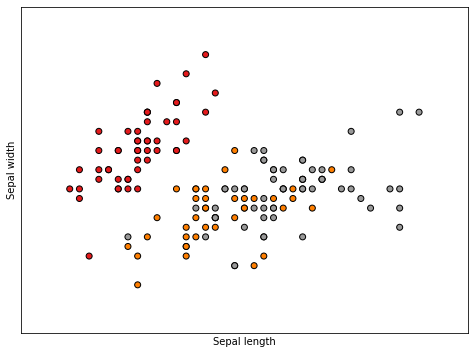

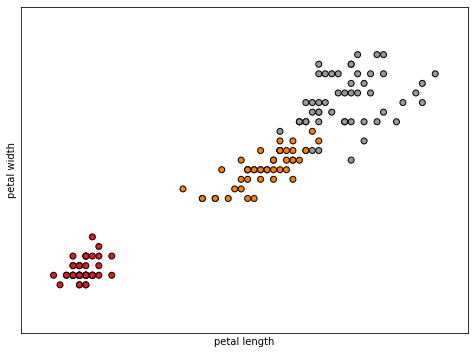

In [107]:
import matplotlib.pyplot as plt

X = iris.data[:, :2]
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

X = iris.data[:, 2:]
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('petal length')
plt.ylabel('petal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Finally, we may want to assess the statistical confidence of the importance scores:

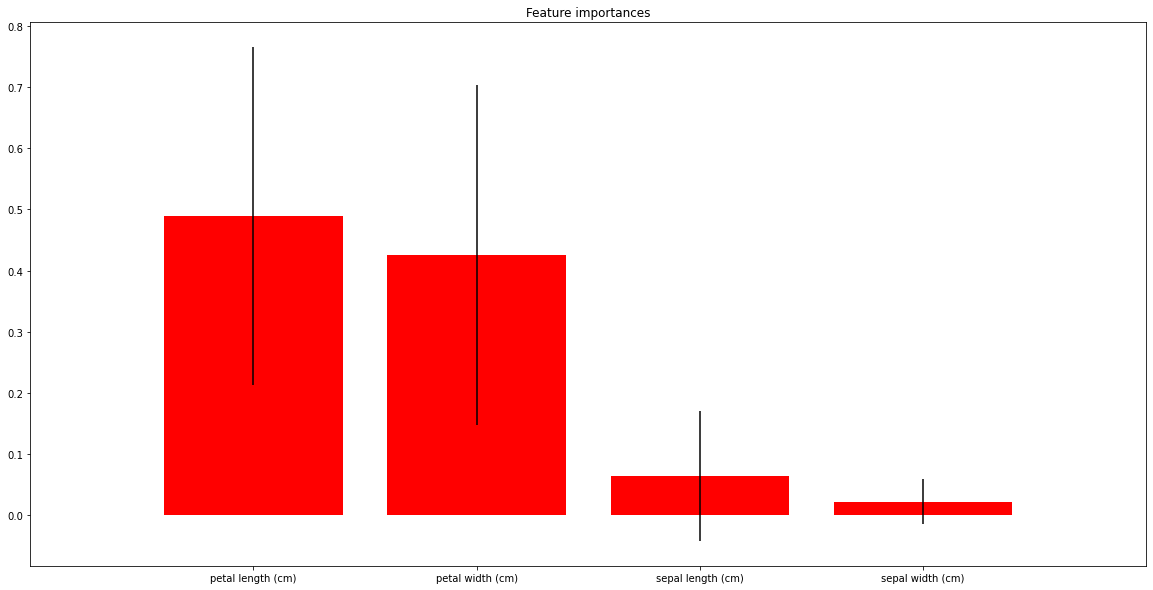

('petal length (cm)', 0.48974857101106845, 0.2764505228988463)
('petal width (cm)', 0.42576588462427273, 0.2784267640196692)
('sepal length (cm)', 0.06321927311615957, 0.1062552541190998)
('sepal width (cm)', 0.021266271248499294, 0.03703588502489514)


In [108]:
# Takes a fitted random forest object and a container of feature names
# returns the features, their importances, and the stds of which,
# and a list of tuples (feature_name, importance, std)
# When parameter show=True, it had the side effect of showing a 
# plt plot of feature importances
def plot_feature_importances(rf, feature_names, show=True):
    num_features = rf.n_features_
    importances = rf.feature_importances_
    stds = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
    feature_names = np.array(feature_names)
    
    #get the indices of the sorted importances and reverse them (make them descending)
    indices = np.argsort(importances)[::-1]
    
    result = [(name, score, std) 
              for name, score, std in zip(feature_names[indices], importances[indices], stds[indices])]
    
    if show:
        plt.figure(figsize=(20,10))
        plt.title("Feature importances")
        plt.bar(range(num_features), importances[indices],
                color="r", yerr=stds[indices], align="center")
        plt.xticks(range(num_features), feature_names[indices])
        plt.xlim([-1, num_features])
        plt.show()
    
    return result
    
    
    
    
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(iris['data'], iris['target'])

scores = plot_feature_importances(rf, iris['feature_names'])

for score in scores:
    print(score)

#### PImp

The idea here is to train a model, get a baseline (generalization) accuracy (or another metric) (for instance with OOB score in the case of bootstrap ensemble techniques) $acc_b$, and then, on a separate validation set, render one feature at a time, $f_i$, useless by randomly permuting its values (by useless is meant take away its predictive ability), and assess the accuracy $acc_{f_i}$ of on the thus altered validation set. Then, the importance of $f_i$ is given by $imp(f_i) = acc_b - acc_{f_i}$. Note that there is no normalization, so that typically
$\sum_{i = 1}^{\textrm{num_features}} imp(f_i) \neq 1$ 

One might be wondering why we "render a feature useless" in this way, rather than just dropping the feature altogether.  Well we could do that (in fact that's DImp), but the cost is that we have to train #features many models, whereas PImp only requires 1 trained model. One might also wonder, why don't we set the value of the feature to a constant, or to a completely random number. The intuition is, If we'd set the value to a constant, we are not rendering the feature useless, we are assuming that it is meaningful and happens to take on a fixed value; we don't choose completely random numbers because they could be out of scope of the feature with respect to the model, and further we want feature values to be drawn from the same distribution as the real feature.

Here is examined the Pimp method on the same datasets as above.

(Note that sklearn implements their own [permutation importance](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance) function, but I implement by own below to demonstrate the basic procedure.)

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.base import clone
import numpy as np
from sklearn.metrics import accuracy_score

In [111]:
rf = RandomForestClassifier(n_jobs=-1, oob_score=True)
iris = load_iris()

num_samples = iris['data'].shape[0]
feature_names = iris['feature_names']
target_variable = iris['target'].astype(np.float64)

# petal lenth + petal width
low_noise_correlated_variable = iris['data'][:, 2] + iris['data'][:, 3] + (np.random.rand(num_samples) * .1)
high_noise_correlated_variable = iris['data'][:, 2] + iris['data'][:, 3] + (np.random.rand(num_samples) * 5)

target_X = np.c_[iris['data'], target_variable]
low_noise_X = np.c_[iris['data'], low_noise_correlated_variable]
high_noise_X = np.c_[iris['data'], high_noise_correlated_variable]
duplicate_X = np.c_[iris['data'], iris['data'][:, 2]]

datasets = {'baseline': iris['data'],
            'target': target_X, 
            'low_noise': low_noise_X, 
            'high_noise': high_noise_X,
            'duplicate petal len': duplicate_X}


def get_pimp_scores(clf, X, y):    
    importances = []
    for i in range(clf.n_features_):
        save = X.copy()
        X[:, i] = np.random.permutation(X[:, i])
        y_pred = clf.predict(X)
        feature_importance = clf.oob_score_ - accuracy_score(y, y_pred)
        importances.append(feature_importance)
        X = save
        
    return importances


for name in datasets.keys():
    X_train, X_val, y_train, y_val = train_test_split(datasets[name], iris['target'])
    clf = clone(rf)
    clf.fit(X_train, y_train)
    print(name, f"generalization accuracy: {clf.oob_score_}")
    feature_names.append(name)
    importances = get_pimp_scores(clf, X_val, y_val)
    for score, feature_name in sorted(zip(importances, feature_names), reverse=True):
        print(feature_name, score)
    print("\n")
    feature_names.remove(name)

baseline generalization accuracy: 0.9642857142857143
petal width (cm) 0.306390977443609
petal length (cm) 0.1484962406015038
sepal length (cm) 0.06954887218045114
sepal width (cm) 0.043233082706766957


target generalization accuracy: 1.0
target 0.07894736842105265
sepal width (cm) 0.0
sepal length (cm) 0.0
petal width (cm) 0.0
petal length (cm) 0.0


low_noise generalization accuracy: 0.9375
low_noise -0.009868421052631526
sepal width (cm) -0.03618421052631582
sepal length (cm) -0.03618421052631582
petal width (cm) -0.03618421052631582
petal length (cm) -0.03618421052631582


high_noise generalization accuracy: 0.9642857142857143
petal length (cm) 0.12218045112781961
sepal width (cm) 0.016917293233082775
sepal length (cm) 0.016917293233082775
petal width (cm) 0.016917293233082775
high_noise 0.016917293233082775


duplicate petal len generalization accuracy: 0.9642857142857143
petal width (cm) 0.09586466165413532
sepal width (cm) 0.043233082706766957
sepal length (cm) 0.043233082706766

Notice the Pimp method doesn't suffer from the bias of deflated scores for relatively low cardinality features - in the `target_X` dataset, the target feature has ultimate importance score, as it should.

#### DImp

The technique here is nearly identical to that of PImp, but as mentioned we have to retrain models, droping features one at a time. 

In [115]:
rf = RandomForestClassifier(n_jobs=-1, oob_score=True)
iris = load_iris()

num_samples = iris['data'].shape[0]
feature_names = iris['feature_names']
target_variable = iris['target'].astype(np.float64)

# petal lenth + petal width
low_noise_correlated_variable = iris['data'][:, 2] + iris['data'][:, 3] + (np.random.rand(num_samples) * .1)
high_noise_correlated_variable = iris['data'][:, 2] + iris['data'][:, 3] + (np.random.rand(num_samples) * 5)

target_X = np.c_[iris['data'], target_variable]
low_noise_X = np.c_[iris['data'], low_noise_correlated_variable]
high_noise_X = np.c_[iris['data'], high_noise_correlated_variable]
duplicate_X = np.c_[iris['data'], iris['data'][:, 2]]

datasets = {'baseline': iris['data'],
            'target': target_X, 
            'low_noise': low_noise_X, 
            'high_noise': high_noise_X,
            'duplicate petal len': duplicate_X}

def get_dimp_scores(clf, X_train, X_val, y_train, y_val):    
    importances = []
    copy = clone(clf)
    generalization_acc = copy.fit(X_train, y_train).oob_score_
    for i in range(X_train.shape[1]):
        copy = clone(clf)
        X_train_temp = np.delete(X_train, i, 1)
        X_val_temp = np.delete(X_val, i, 1)
        copy.fit(X_train_temp, y_train)
        y_pred = copy.predict(X_val_temp)
        feature_importance = generalization_acc - accuracy_score(y_val, y_pred)
        importances.append(feature_importance)
        
    return importances



for name in datasets.keys():
    X_train, X_val, y_train, y_val = train_test_split(datasets[name], iris['target'])
    clf = clone(rf)
    feature_names.append(name)
    importances = get_dimp_scores(clf, X_train, X_val, y_train, y_val)
    clf.fit(X_train, y_train)
    print(name, f"generalization accuracy: {clf.oob_score_}")
    for score, feature_name in sorted(zip(importances, feature_names), reverse=True):
        print(feature_name, score)
    print("\n")
    feature_names.remove(name)

baseline generalization accuracy: 0.9553571428571429
petal length (cm) 0.06062030075187974
petal width (cm) 0.03430451127819556
sepal width (cm) 0.007988721804511378
sepal length (cm) 0.007988721804511378


target generalization accuracy: 1.0
target 0.052631578947368474
sepal width (cm) 0.0
sepal length (cm) 0.0
petal width (cm) 0.0
petal length (cm) 0.0


low_noise generalization accuracy: 0.9464285714285714
sepal width (cm) 0.007988721804511378
sepal length (cm) 0.007988721804511378
petal width (cm) 0.007988721804511378
petal length (cm) 0.007988721804511378
low_noise 0.007988721804511378


high_noise generalization accuracy: 0.9642857142857143
sepal width (cm) 0.043233082706766957
sepal length (cm) 0.043233082706766957
petal length (cm) 0.043233082706766957
high_noise 0.043233082706766957
petal width (cm) 0.016917293233082775


duplicate petal len generalization accuracy: 0.9464285714285714
petal width (cm) -0.0009398496240601295
sepal width (cm) -0.027255639097744422
sepal length (

#### MDSP 

The idea here is to use an emsemble not to predict instance classes but to predict the instances' *proximities* to each other. For each pair of instances $i, j$ their prxomity $p_{i,j}$ is the (perhaps normalized) amount of times the instances fall into the same leaf node. Thus, if there are $N$ instances, the $N \times N$ proximity matrix is $P = [p_{i,j}]$. The proximities should give a measure of how similar the instances are in terms of what the forest believes their class is. Why not just take their distance via some metric-space metrics, e.g. Euclidean distance? Euclidean distance will not say what cloud of points an instance belongs to and hence it's not necessarily the right similarity measure. But if the random forest has low generalization error, then proximity should be a reasonable measure.

With the proximities in hand, we perform *multi-dimensional scaling* ([MDS](https://en.wikipedia.org/wiki/Multidimensional_scaling)). MSD is an old non-linear dimensionality reduction technique, which, given similarities or dissimilarities between $N$ points, aims to embed the points in a lower-dimensional space (typically 1, 2, or 3, for visualization) while as much as possible preserving the similarities/dissimilarities (by minimizing a loss function which penalizes embeddings that change the similarities/dissimilarities). Sklearn implements its own [`manifold.MDS`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html#sklearn.manifold.MDS) estimator and gives a nice explanation in the [user guide](https://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling).

There are different formulations of MDS (and for that matter different ways of embedding points in lower-dimensional space in non-linear ways and for that matter different ways of finding instance similarity), but I show non-metric MDS here, where the general principle is to preserve the ordinality of the similarities in the embeddeding: that is if $s_{i,j}$ is the similarity of $x_i$ and $x_j$ and $d_{i,j}$ is the similarity of their embeddings (we do not have to compute this with the model used to get the original similarities), and if $s_{i,j} \leq s_{j,k}$, then  $d_{i,j} \leq d_{j,k}$.

Note that `manifold.MDS` takes a dissimilarity matrix, larger values corresponds to more dissimilarity, but $P$ is such that larger numbers indicate more similarity. So we have to make a slight midification to what we input to `manifold.MDS`. The story is similar for the case of `manifold.TSNE`, a procedure explained in the later section of dimensionality reduction and manifold learning.

In [116]:
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

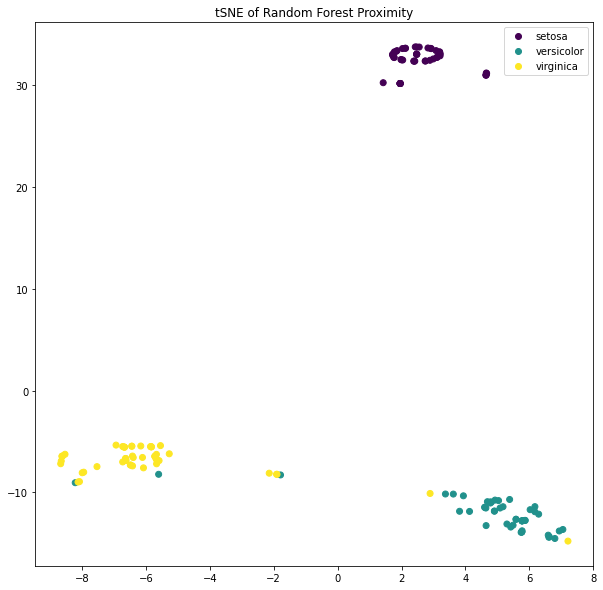

In [117]:
rf = RandomForestClassifier(n_jobs=-1)
X = iris['data']
y = iris['target']

def _get_proximity(leaf_indices, instance_i, instance_j):
    proximity = 0
    num_estimators = leaf_indices.shape[1]
    for estimator_index in range(num_estimators):
        if leaf_indices[instance_i, estimator_index] == leaf_indices[instance_j, estimator_index]:
            proximity +=1
    return proximity

def _get_proximity_matrix(rf, X, normalize=True):
    num_instances = X.shape[0]
    proximity_matrix = np.zeros((num_instances, num_instances))
    leaf_indices = rf.apply(X)
    num_trees = leaf_indices.shape[1]
    for instance_i in range(num_instances):
        for instance_j in range(num_instances):
            proximity_matrix[instance_i, instance_j] = _get_proximity(leaf_indices, instance_i, instance_j)
            
    if normalize:
        return proximity_matrix / num_trees
    return proximity_matrix

def _get_dissimilarity_matrix(proximity_matrix):
    return np.abs(proximity_matrix - proximity_matrix[0, 0])

#takes a fitted RandomForestClassifier
def visualize_proximity(rf, X, y, target_names, n_components=2, method='mds'):
    proximity_matrix = _get_proximity_matrix(rf, X)
    dissimilarity_matrix = _get_dissimilarity_matrix(proximity_matrix)
    if method == 'mds':
        mds = MDS(n_components=n_components, 
                  metric=False, 
                  n_jobs=-1, 
                  max_iter=3000, 
                  dissimilarity="precomputed", 
                  eps=1e-10)
        embeddings = mds.fit_transform(dissimilarity_matrix)
    elif method == 'tsne':
        tsne = TSNE(n_components=n_components,
                    metric="precomputed")
        embeddings = tsne.fit_transform(dissimilarity_matrix)

    #rescale & rotate the data here?
    fig, ax = plt.subplots(figsize=(10,10))
    scatter = ax.scatter(embeddings[:, 0], embeddings[:, 1], c=y)
    title = "MDS of Random Forest Proximity" if method == "mds" else "tSNE of Random Forest Proximity"
    plt.title(title)
    legend = ax.legend(scatter.legend_elements()[0], target_names)
    plt.show()
    
rf.fit(X, y)
visualize_proximity(rf, X, y, target_names=iris['target_names'], method='tsne')

## Boosting

I only discuss gradient boosting, although there are other techniques e.g. adaboost. Sklearn implements its own [`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) but here is reviewed mostly the [XGBoost library](https://xgboost.readthedocs.io/en/latest/index.html). On a high level both libraries implement gradient boosting, but it's noted that XGBoost is faster and has better results, handles missing values better, and is more memory efficient, supports GPU computation and distributed frameworks, and can be parallelized. This may change in the future. XGBoost is tree-based, and, to quote its website, it "solves data science problems in a fast and accurate way ... and can solve problems beyond billions of examples [on a distributed framework]." (Note: It may soon or already be eclipsed however by [LightGBM](https://lightgbm.readthedocs.io/en/latest/), an open source gradient boosting implementation released by Microsoft.)

**Gradient boosting (in particular when implemented by a high quality library like XGBoost) is said to be perhaps
the strongest prediction technique in data science when it comes to structured i.e. tabular data.**

The idea is to train ensemble members $h_i$ *sequentially*, each learning how to predict the errors or residuals of the previous member (except $h_1$ which is trained directly on the data). Once $n$ (a hyperparameter) of which have been trained, then predictions are made via summing the members, i.e. $\textrm{y_pred} = \sum_{i = 1}^{n} h_i(x)$. This is a grossly oversimplified explanation of what's happening under the hood and only one of the ways this idea can be implemented (measures are taken to de-correlate the members, prevent overfitting, optimize training time and space complexity and model generalization, etc.), but it'll do. 

<img src="grad-boost-diagram.png">

In [234]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

Here is a basic example to show the effectiveness of gradient boosting.

In [130]:
#This is an XGBoost classifier wrapped in an sklearn model 
xgb_clf = xgb.XGBClassifier()

rf_clf = RandomForestClassifier()
iris = load_iris()
X = iris['data']
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y)
y_pred_xgb = cross_val_predict(xgb_clf, X_train, y_train)
y_pred_rf = cross_val_predict(rf_clf, X_train, y_train)
print("XGB report")
print(classification_report(y_train, y_pred_xgb))
print("RF report")
print(classification_report(y_train, y_pred_rf))

XGB report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.95      0.95        40
           2       0.94      0.94      0.94        36

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112

RF report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.95      0.95        40
           2       0.94      0.94      0.94        36

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



### Detailed XGBoost Guide

Here I discuss mainly the [sklearn wrapper API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn) but note that APIs for other frameworks and languages exist as well, and even when using Python one doesn't have to use the sklearn wrapper API since XGBoost implements a [standalone framework](https://xgboost.readthedocs.io/en/latest/python/python_api.html#). I stick to the [`XGBClassifier`](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier) for simplicity of showing how xgb works basically, but note that there is much more, for instance an `XGBRegressor`. 

As usual, the thing at focus here is practical model building: considerations concerning how to train, test, and debug models, tune hyperparameters, mitigate overfitting, etc..

#### Key Parameters:

The first level (aka general) parameters (format `param_name=default_val`) are:

1. `booster='gbtree'` $\in$ ('gbtree', 'dart', 'gblinear')

2. `n_jobs=1` (-1 to use all available CPUs). 

Depending on the choice of `booster` there will be different families of second level parameters. **I focus on the tree booster** (technically 'dart' is tree-based as well).

The next level (aka booster) parameters are used to balance variance and bias (here is summarized only booster parameters for`booster='gbtree'`):

1. `learning_rate=0.3`  $\in (0,1]$ controls the shrinkage in contribution from each boosting round (decrease to reduce overfitting)

**Note: when decreasing `learning_rate`, one usually has to compensate by increasing `n_estimators`. Strike a balance.**

2. `n_estimators=100` $\in \{1, 2, 3, ...\}$ number of boosting rounds (decrease to reduce overfitting)

3. `max_depth=6` $\in \{1, 2, 3, ...\}$ max tree depth (decrease to reduce overfitting)

**Note: aggressive memory consumption when training a deep tree** 

4. `min_child_weight=1.0` $\in [0, \infty)$ min number of instance weight needed in a child in order to split a leaf (increase to reduce overfitting)

5. `gamma=0.0` $\in [0, \infty)$ min loss reduction needed in order to split a leaf node (increase to reduce overfitting)

6. `subsample=1.0` $\in (0, 1]$ proportion of training data to sample at each boosting step (decrease to reduce overfitting)

7. `colsample_bytree=1.0` $\in (0, 1]$ proportion of feature columns to sample at each boosting step (decrease to reduce overfitting)

**Note: There's also `colsample_bylevel` and `colsample_bynode` and they follow the same rules. Note that they are cumulative when more than one of these parameters are passed**

There are other parameters to control model complexity and characteristics, but they are omitted here for brevity as the essential such parameters are above. 

The next level (aka learning task) parameters specify the learning in terms of objective function and evaluation metric(s) for validation. Each choice for `objective` has its own default `eval_metric`. These are many and its recommended to refer to the [documentation](https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters) for description of choices. Note that the sklearn wrapper default argument for `XGBClassifier` is `objective='binary:logisitc'`

**Note: When doing multiclass classification we may set `objective='multi:softmax'` (or `multi:softprob` if we wish to predict probabilities) as well as the `num_classes` variable. XGBoost the uses OvR. But if we don't set these parameters and there are more than two classes, XGBoost sklearn wrapper is smart enough to figure out the number of classes and use softmax and OVR.**

The next level controls the training complexity in terms of computational time and space: 

`tree_method='auto'` $\in$ ('auto', 'exact', 'approx', 'hist', 'gpu_hist') (later 3 supported for distributed training) the feature & threshold selection algorithm used to grow the tree (to split a leaf). If the default is chosen xgboost will choose 'exact' or 'approx' according by the dataset size. It is recommended to try 'hist' (histogram optimized greedy algorithm) for large datasets, and 'gpu_hist' if available. 

`max_bin=256` (only to be used if `tree_method='*hist'`) max number of bins in which to histogram continuous features. Increasing improves optimality of splits at the cost of computational time. 

The last level controls properites of the data:

1. For unbalanced problems (deficient in the positive class) it's recommended to use the `scale_pos_weight` (default 1.0) parameter. A good first value to check would be num(negative class) / num (positive class)

2. `missing=np.nan` signifies the value of missing data. 

3. `interaction_constraints` list of lists e.g. [[0, 1], [2, 3 ,4]]. Each inner list is a group of feature indices that are allowed to interact. Use this if from domain knowledge or some other reason you know that certain features should not interact and you want to restrict the model from learning such interactions. If the above argument were passed, then a tree with a node using feature 0 to split the dataset may then only use feature 1 (or feature 0 again) to split descendant nodes, and vice versa; likewise a tree with a node using feature 2 to split the data may only use features 2, 3, or 4 to split descendant nodes. In both cases the ascendant nodes would comply with the constraints as well. If a tree had a node using feature 5 to split, then neither feature 0, 1, 2, 3 nor 4 could be used to split a descendant (and of course none of the ascendants would use feature 0, 1, 2, 3 or 4). Keep in mind that this implies [[0, 1], [1, 2]] would be the same as [[0, 1, 2]].


In [161]:
xgb_clf = xgb.XGBClassifier(n_jobs=-1)
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=42)

param_grid = {
    'learning_rate' : np.linspace(0.2, 0.9, 10),
    'n_estimators' : [75, 100, 125],
    'max_depth' : [4, 5, 6, 7],
    'subsample' : np.linspace(0.1, 1, 5),
    'colsample_bytree' : np.linspace(0.1, 1, 5)}

# If we weren't using grid search we would type
#
# clf.set_params(**params)
#
# where params of course wouldn't be a grid but a dict of single parameter values.
# Alternatively one could do
#
# clf = xgb.XGBClassifier(**params)
#
# but don't forget the kwargs unpacking operator **
clf = GridSearchCV(xgb_clf, param_grid=param_grid, scoring='roc_auc_ovr', cv=3, n_jobs=-1)
clf.fit(X_train, y_train)

print(clf.best_score_)
print(clf.best_params_)

y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9924358974358974
{'colsample_bytree': 0.1, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.1}
1.0


XGBoost also takes care of [early stopping](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor.fit). All we have to do is pass the below parameters to the `fit` method. Note that the returned estimator is not the one associated with the best iteration, but the one associated with the final iteration when the training was terminated by early stopping. I show how to use this technique below, although I don't think it plays nice with `GridSearchCV`.

In [235]:
xgb_clf = xgb.XGBClassifier()
iris = load_iris()

# I explain below why I call these validation and not test.
# Assume that I've already set aside a test set
X_train, X_val, y_train, y_val = train_test_split(iris['data'], iris['target'], random_state=42)

param_grid = {
    'learning_rate' : np.linspace(0.1, 1.0, 10),
    'max_depth' : [3, 4, 5, 6],
    'subsample' : np.linspace(0.1, 1, 10),
    'colsample_bytree' : np.linspace(0.1, 1, 10)}

#eval_metric in this case could be 'merror' or 'mlogloss' (others might cause errors)
fit_params = {
    'early_stopping_rounds' : 15,
    'eval_metric' : 'merror',
    'eval_set' : [[X_val, y_val]]}

clf = GridSearchCV(xgb_clf, param_grid, n_jobs=-1, cv=3, scoring='roc_auc_ovr')

# While the grid search is cross validating over the training data,
# each time the fit method of xgb_clf is called XGBoost automatically performs
# early stopping, using the validation data to assess model generalization.
# The eval_metric has to improve at least once every early_stopping_rounds rounds in order for
# training to proceed (for another sequential weak learner to be added)
clf.fit(X_train, y_train, **fit_params)

[0]	validation_0-merror:0.02632
Will train until validation_0-merror hasn't improved in 15 rounds.
[1]	validation_0-merror:0.02632
[2]	validation_0-merror:0.00000
[3]	validation_0-merror:0.00000
[4]	validation_0-merror:0.00000
[5]	validation_0-merror:0.00000
[6]	validation_0-merror:0.00000
[7]	validation_0-merror:0.00000
[8]	validation_0-merror:0.00000
[9]	validation_0-merror:0.00000
[10]	validation_0-merror:0.00000
[11]	validation_0-merror:0.00000
[12]	validation_0-merror:0.00000
[13]	validation_0-merror:0.00000
[14]	validation_0-merror:0.00000
[15]	validation_0-merror:0.00000
[16]	validation_0-merror:0.00000
[17]	validation_0-merror:0.00000
Stopping. Best iteration:
[2]	validation_0-merror:0.00000



GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': arr

In [245]:
print(clf.best_params_)
print(clf.best_score_)

{'colsample_bytree': 0.5, 'learning_rate': 0.8, 'max_depth': 4, 'subsample': 1.0}
0.9924287749287748


The above output shows that after 3 trees are grown (3 boosting rounds) the multiclass-error rate drops to 0 and so obviousy no improvement can be made thereafter on the validation set - early stopping halts the algorithm after 18th iteration. 

**Note:** After training is complete predictions are made using the fully grown booster, in this case with 18 trees, rather than the model using the best number of trees. If we want such a tree, we have to retrain a model using `n_estimators=trained_model.best_iteration` (note if we train the model with `GridSearchCV` we need to use `trained_model.best_estimator_.best_iteration`). Early stopping is useful for the experimental process of model building in terms of saving time and finding the most powerful model. In an application where we have to refresh the model every $x$ hours we wouldn't want to use early stopping and then have to retrain if the data is large - we should have already figured out a decent ballpark for `n_estimators` earlier, using early stopping (we can use grid search when we refresh our model, centering the grid around the thus a priori known `best_iteration`)

One has to dig into Stack Overflow to figure out how to do stuff like use the `early_stopping_rounds` parameter of the `XGBClassifier`'s `.fit()` method when using `GridSearchCV`, and further how to `sklearn.model_selection.KFold` it and stuff like that. **I'm not sure that the above code implements early stopping with grid search, as from the output it seems that early stoping was only performed once. My guess would be that some bespoke code needs to be written to accomplish this as I couldn't find anything on the web.** See below for my (simplest working case) implementation.

In [270]:
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.metrics import accuracy_score

In [290]:
MAX_ITERATION = 2000

def get_best_early_stopping_grid_search_params(model, 
                                               X, 
                                               y, 
                                               param_grid, 
                                               cv=5,
                                               **fit_params):
    best_index = 0
    best_score = 0
    std_best_score = 0
    params = list(ParameterGrid(param_grid))
    best_iterations = []
    for i in range(len(params)):
        scores = []
        splitter = StratifiedKFold(n_splits=cv, shuffle=True)
        base_model = clone(model)
        retrain_model = clone(model)
        base_model.set_params(n_estimators = MAX_ITERATION, **(params[i]))
        for train_indices, test_indices in splitter.split(X, y):
            base_model.fit(X[train_indices], y[train_indices], verbose=False, **fit_params)
            best_iteration = base_model.best_iteration
            best_iterations.append(best_iteration)
            retrain_model.set_params(n_estimators=best_iteration, **(params[i]))
            retrain_model.fit(X[train_indices], y[train_indices], verbose=False)
            y_pred = retrain_model.predict(X[test_indices])
            score = accuracy_score(y[test_indices], y_pred)
            scores.append(score)
        avg_score = np.mean(scores)
        std_score = np.std(scores)
        if avg_score > best_score:
            best_score = avg_score
            std_best_score = std_score
            best_index = i
            
    result = {'best_params': params[best_index], 
              'best_n_estimators' : best_iterations[best_index],
              'best_score' : best_score, 
              'std_best_score' : std_best_score}
    return result
        

In [293]:
xgb_clf = xgb.XGBClassifier()
iris = load_iris()

X_train, X_val, y_train, y_val = train_test_split(iris['data'], iris['target'], random_state=42)

param_grid = {
    'learning_rate' : np.linspace(0.1, 1.0, 10),
    'max_depth' : [3, 4, 5, 6],
    'subsample' : np.linspace(0.1, 1, 10),
    'colsample_bytree' : np.linspace(0.1, 1, 10)}

fit_params = {
    'early_stopping_rounds' : 15,
    'eval_metric' : 'merror',
    'eval_set' : [[X_val, y_val]]}

results = get_best_early_stopping_grid_search_params(xgb_clf,
                                                     X_train,
                                                     y_train,
                                                     param_grid=param_grid,
                                                     cv=3,
                                                     **fit_params)

for key in results.keys():
    print(key, results[key])

best_params {'colsample_bytree': 0.4, 'learning_rate': 0.6, 'max_depth': 4, 'subsample': 0.1}
best_n_estimators 38
best_score 0.9644381223328592
std_best_score 0.012070101528077675


XGBoost also implements utilities for [model persistance](https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html#) (as does [sklearn](https://scikit-learn.org/stable/modules/model_persistence.html)), as does the [xgboost sklearn API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier.save_model)

In [298]:
clf = xgb.XGBClassifier(n_jobs=-1)

params = {'max_depth': 4,
          'n_estimators': 38,
          'learning_rate': 0.6,
          'subsample': 0.1,
          'colsample_bytree': 0.4}

clf.set_params(**params)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

clf.save_model('model0')

clf1 = xgb.XGBClassifier()
clf1.load_model('model0')

y_pred_1 = clf.predict(X_test)
print(np.all(y_pred == y_pred_1))

1.0
True


## Stacking

The basic idea here it so combine a simultaneously-trained ensemble's predictions not in a hard-coded way like voting, but by feeding them into another model (called a "blender") as its *training* data (the training targets for this model being the original targets). The idea can be extended to more than one blending layer. The advantage here over boosting is that the models can be trained in parallel with no communication between them. But it's possible that you will need an exponential amount of models to match the power of boosting, and this will require more data. On the other hand stacking is somewhat heuristic and there's more research supporting the use of boosting.

### Training the ensemble
<img src="stack-training-1.png">

### Training the blender
<img src="stack-training-2.png">

### Making predictions
<img src="stack-predicting.png">